# **Predict Earthquake Damage to Building in Nepal (Part 1)**
## **Reynara Ezra Pratama**

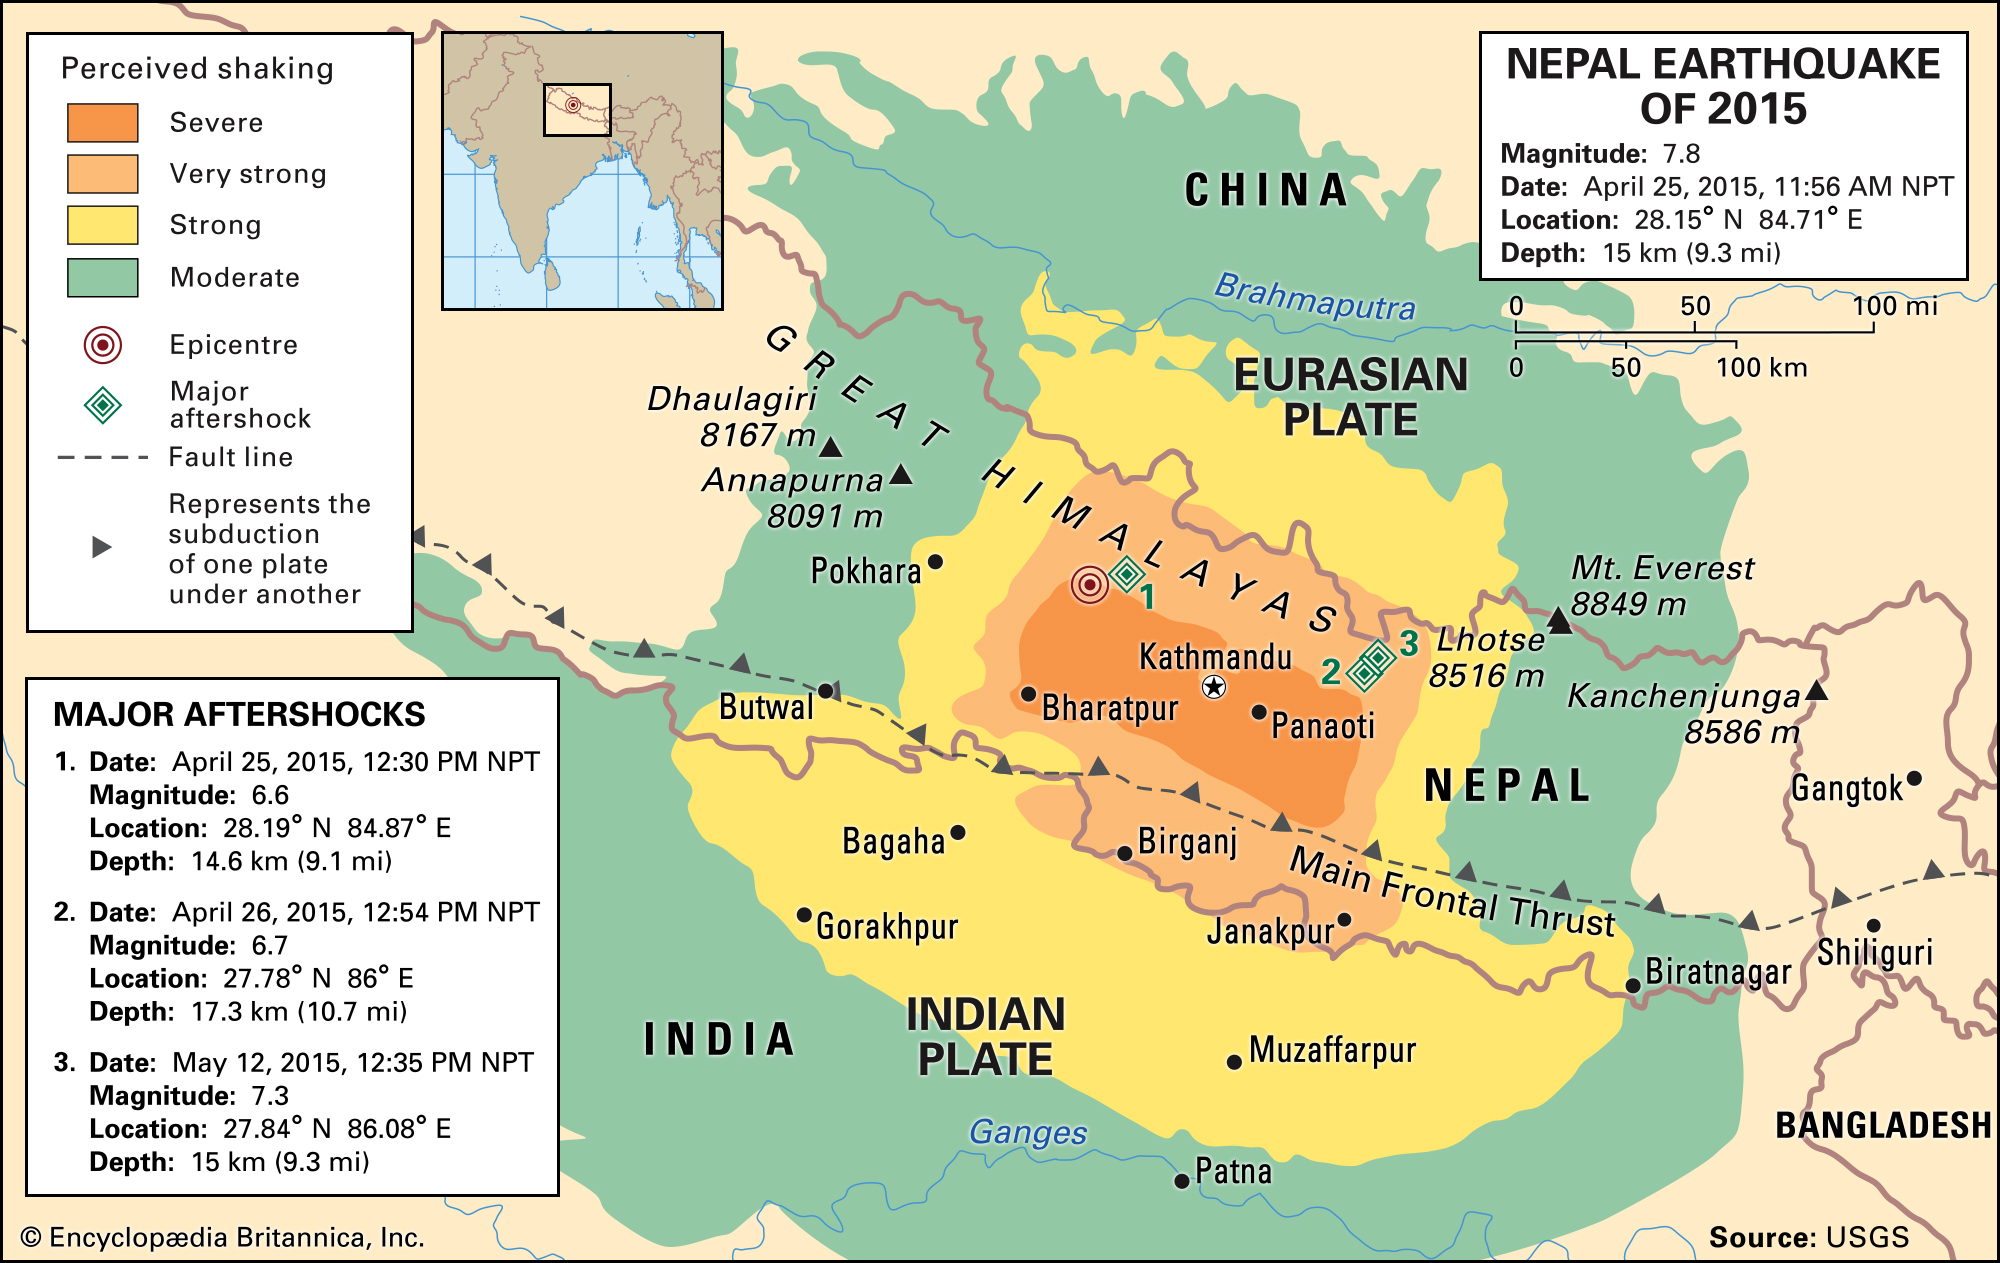

[Source : Britanica](https://cdn.britannica.com/90/182390-050-2221B963/earthquake-Map-Nepal-region-temblor-thousands-people-April-25-2015.jpg)

Pada tanggal 25 April 2015, terjadi gempa bumi berkekuatan 7,8 Skala Richter di Nepal. Pasca kejadian tersebut, dilakukan banyak penelitian dan penyelidikan di lapangan untuk melihat kerusakan yang terjadi pada bangunan yang terkena dampak dari gempa bumi tersebut. Dikarenakan jumlah bangunan dan variasi bangunan yang sangat banyak, proses penyelidikan pasca gempa menjadi sulit untuk dilakukan. Namun, dengan mengetahui deskripsi dari suatu bangunan, dapat membantu kita dalam menentukan tingkat kerusakan yang ada pada bangunan tersebut.




Data dikumpulkan melalui survei oleh [Kathmadu Living Labs](https://www.kathmandulivinglabs.org/) dan [Central Bureau of Statistics](https://cbs.gov.np/) yang bekerja di bawah Sekretariat Komisi Perencanaan Nasional Nepal. Survei ini merupakan salah satu kumpulan data pascabencana terbesar yang pernah dikumpulkan, yang berisi informasi berharga tentang dampak gempa bumi, kondisi rumah tangga, dan statistik sosio-ekonomi-demografis.

Adapun dataset pada permasalahan ini dapat dilihat pada [Earthquake Nepal 2015](https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/)

## **Business Understanding**


1.   Mendapatkan gambaran bagaimana kerusakan yang ada pada bangunan yang ada di Nepal
2.   Memberikan rekomendasi berupa material atau karakteristik spesifik yang dapat digunakan dalam membangun suatu bangunan untuk mengurangi dampak kerusakan yang ditimbulkan dari gempa bumi.
3.   Memprediksi level kerusakan bangunan yang terkena dampak gempa bumi Nepal 2015.


## **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Loading Dataset**

**Load Data from github**

In [2]:
# url_train_label = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_labels.csv'
# url_train_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_values.csv'
# url_test_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/test_values.csv'

# train_label = pd.read_csv(url_train_label)
# train_value = pd.read_csv(url_train_value)
# test_value = pd.read_csv(url_test_value)

**Load Data from local file**

In [3]:
train_label = pd.read_csv("train_labels.csv")
train_value = pd.read_csv("train_values.csv")
test_value = pd.read_csv("test_values.csv")

# **Checking Data**

Pertama, kita akan mengecek ukuran dari data kita menggunakan attribut `.shape`

In [4]:
print('Train Values : {}'.format(train_value.shape))
print('Train Labels : {}'.format(train_label.shape))
print('Test Values : {}'.format(test_value.shape))

Train Values : (260601, 39)
Train Labels : (260601, 2)
Test Values : (86868, 39)


In [5]:
print('Number of Training Data : {}'.format(train_value.shape[0]))
print('Number of Testing Data : {}'.format(test_value.shape[0]))
print('Total Data : {}'.format(train_value.shape[0]+test_value.shape[0]))

Number of Training Data : 260601
Number of Testing Data : 86868
Total Data : 347469


Terlihat bahwa terdapat 260601 baris pada *Training Data* dan 86868 baris pada *Testing Data* sehingga jumlah data yang kita miliki sebesar 347469 baris. 

Akan dilihat 5 data teratas pada `train_label`, `train_value`, dan `test_value` menggunakan method `.head()`.

In [6]:
train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
train_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


## **Description**

**Penjelasan Label**

Pada permasalahan ini, kita akan memprediksi variabel ordinal **`damage_grade`**, yang merepresentasikan level kerusakan dari suatu bangunan yang terdampak gempa bumi. Terdapat 3 buah level kerusakan yaitu :
*   **1** : Merepresentasikan kerusakan ringan
*   **2** : Merepresentasikan kerusakan sedang
*   **3** : Merepresentasikan kerusakan tinggi (hampir hancur seluruhnya)



**Penjelasan Feature** '

Pada feature memuat data tentang struktur bangunan dan kepemilikan legal dari bangunan tersebut. Setiap baris pada data tersebut menunjukkan suatu bangunan tertentu di wilayah yang terkena gempa.
Terdapat **39** kolom pada dataset, dimana kolom **`building_id`** adalah unik dan sebagai pengenal. Pada dataset, munculnya karakter yang sama pada kolom yang berbeda tidak menunjuk pada nilai asli yang sama. Adapun penjalasan dari **38** feature lainnya adalah :
*   **`geo_level_1_id`**, **`geo_level_2_id`**, dan **`geo_level_3_id`** (tipe:int) : Menunjukkan wilayah geografis tempat bangunan berada, dimulai dari tingkat terbesar (tingkat 1) hingga sub-kawasan spesifik (tingkat 3). Kemungkinan nilai : (level 1: 0-30), (level 2: 0-1427), (level 3: 0-12567).
*   **`count_floors_pre_eq`** (tipe:int) : Banyaknya jumlah lantai pada bangunan sebelum gempa bumi.
*   **`age`** (tipe:int) : Umur suatu bangunan dalam tahun.
*   **`area_percentage`** (tipe:int) : Luas bangunan yang dinormalisasi.
*   **`height_percentage`** (tipe:int) : Tinggi bangunan yang dinormalisasi.
*   **`land_surface_condition`** (tipe:kategorikal) : Kondisi permukaan tanah tempat bangunan tersebut dibangun. Kemungkinan nilai : `n`, `o`, `t`.
*   **`foundation_type`** (tipe:kategorikal) : Jenis pondasi yang digunakan dalam membangun bangunan. Kemungkinan nilai : `h`, `i`, `r`, `u`, `w`.
*   **`roof_type`** (tipe:kategorikal) : Jenis atap yang digunakan dalam membangun bangunan. Kemungkinan nilai : `n`, `q`, `x`.
*   **`ground_floor_type`** (tipe:kategorikal) : Jenis lantai yang digunakan pada lantai dasar bangunan. Kemungkinan nilai : `f`, `m`, `v`, `x`, `z`.
*   **`other_floor_type`** (tipe:kategorikal) : Jenis lantai yang digunakan selain pada lantai dasar bangunan. Kemungkinan nilai : `j`, `q`, `s`, `x`.
*   **`position`** (tipe:kategorikal) : Posisi dari bangunan. Kemungkinan nilai : `j`, `o`, `s`, `t`.
*   **`plan_configuration`** (tipe:kategorikal) : Konfigurasi denah bangunan. Kemungkinan nilai : `a`, `c`, `d`, `f`, `m`, `n`, `o`, `q`, `s`, `u`.
*   **`has_superstructure_adobe_mud`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Adobe/Mud.
*   **`has_superstructure_mud_mortar_stone`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Stone.
*   **`has_superstructure_stone_flag`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Stone.
*   **`has_superstructure_cement_mortar_stone`** (tipe:biner): Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Stone.
*   **`has_superstructure_mud_mortar_brick`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Brick.
*   **`has_superstructure_cement_mortar_brick`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Brick.
*   **`has_superstructure_timber`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Timber.
*   **`has_superstructure_bamboor`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Bamboo.
*   **`has_superstructure_rc_non_engineered`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari non-engineered reinforced concrete.
*   **`has_superstructure_rc_engineered`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari engineered reinforced concrete.
*   **`has_superstructure_other`** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari material lain.
*   **`legal_ownership_status`** (tipe:kategorikal) : Status kepemilikan yang sah dari tanah tempat bangunan dibangun. Kemungkinan nilai :  `a`, `r`, `v`, `w`.
*   **`count_family`** (tipe:int) : Jumlah keluarga yang tinggal pada bangunan tersebut.
*   **`has_secondary_use`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sekunder. 
*   **`has_secondary_use_agriculture`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan pertanian.
*   **`has_secondary_use_hotel`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai hotel.
*   **`has_secondary_use_rental`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sewa. 
*   **`has_secondary_use_institution`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai lokasi institusi manapun.
*   **`has_secondary_use_school`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai sekolah.
*   **`has_secondary_use_industry`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan industri. 
*   **`has_secondary_use_health_post`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai pos kesehatan. 
*   **`has_secondary_use_gov_office`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor pemerintahan.
*   **`has_secondary_use_use_police`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor polisi.
*   **`has_secondary_use_other`** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan lainnya.

## **Data Preparation**

**Merge feature and label on training data**

Karena data pada *training data* kita masih terpisah pada `train_value` dan `train_label`, kita perlu menggabungkan dua data tersebut menggunakan `pd.merge()` yang secara otomatis akan menggabungkan berdasarkan kolom `building_id`.

In [9]:
train = pd.merge(train_value, train_label)

**Check the top 5 data, bottom 5 data, and 5 random data**

In [10]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [11]:
train.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [12]:
train.sample(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
23913,775524,8,659,7703,2,15,5,5,n,r,...,0,0,0,0,0,0,0,0,0,3
252595,85085,18,977,2847,1,20,6,3,t,r,...,0,0,0,0,0,0,0,0,0,3
72320,794653,17,414,11203,2,5,13,7,t,r,...,0,0,0,0,0,0,0,0,0,2
46911,756701,8,1225,3947,3,20,12,7,t,r,...,0,0,0,0,0,0,0,0,0,2
178042,616630,11,765,10814,2,30,6,6,t,r,...,0,0,0,0,0,0,0,0,0,3


**Check Null and Duplicate Data**

Untuk melihat apakah terdapat data yang kosong, kita dapat menggunakan `isnull()` dan `.sum()` untuk melihat apakah terdapat data kosong pada tiap kolom *training data*. 

In [13]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Tidak ada data yang kosong

In [14]:
print('Ukuran data sebelum drop duplicate :', train.shape)
train = train.drop_duplicates(subset='building_id', keep='last')
print('Ukuran data setelah drop duplicate :', train.shape)

Ukuran data sebelum drop duplicate : (260601, 40)
Ukuran data setelah drop duplicate : (260601, 40)


Tidak ada data yang kembar pada kolom **`building_id`**

**Training Data Columns and Info**

In [15]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Terdapat 32 kolom pada data yang bertipe integer dan 8 kolom yang bertipe object.

**Kolom Tipe Numerik**

In [17]:
train.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

Kolom Tipe Kategorikal

In [18]:
train.select_dtypes(include=['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

**Summary Data**

In [19]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Berdasarkan statistika deskriptif di atas, terlihat untuk rataan jumlah lantai bangunan adalah 2 lantai. Rata-rata umur bangunan adalah 26.53 tahun dan memiliki bangunan yang berumur sangat tua yaitu 995 tahun. Bangunan yang sangat tua ini dapat memengaruhi nilai rataan umur bangunan. Untuk rataan luas dan tinggi bangunan yaitu 8.01 $m^2$ untuk luas bangunan dan 5.43 $m$ untuk tinggi bangunan.

In [20]:
train.describe(include='all')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


# **Exploratory Data Analysis**

## **Plot Label Data**

In [21]:
train['damage_grade'] = train['damage_grade'].astype('category')

In [22]:
train['damage_grade'] = train['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

In [23]:
train['damage_grade'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [24]:
train['damage_grade'].value_counts()

Medium    148259
High       87218
Low        25124
Name: damage_grade, dtype: int64

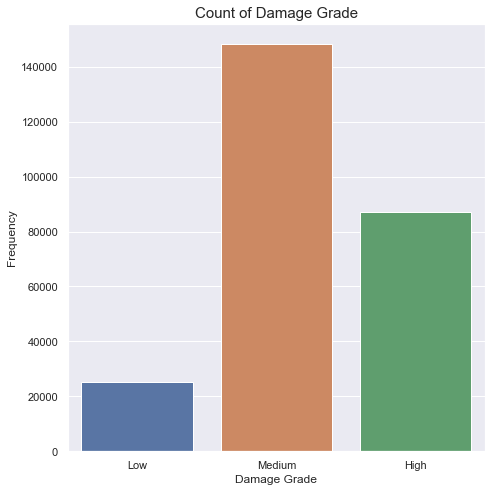

In [25]:
plt.figure(figsize=(7,7))

sns.set_theme()
sns.countplot(train['damage_grade'], order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

In [26]:
print('Jumlah Bangunan dengan tingkat kerusakan rendah : {}'.format(sum(train['damage_grade']=='Low')))
print('Jumlah Bangunan dengan tingkat kerusakan menengah : {}'.format(sum(train['damage_grade']=='Medium')))
print('Jumlah Bangunan dengan tingkat kerusakan tinggi : {}'.format(sum(train['damage_grade']=='High')))
print('')
print('Persentase Bangunan dengan tingkat kerusakan rendah : {:.2f}%'.format(sum(train['damage_grade']=='Low')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan menengah : {:.2f}%'.format(sum(train['damage_grade']=='Medium')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan tinggi : {:.2f}%'.format(sum(train['damage_grade']=='High')/train.shape[0]*100))

Jumlah Bangunan dengan tingkat kerusakan rendah : 25124
Jumlah Bangunan dengan tingkat kerusakan menengah : 148259
Jumlah Bangunan dengan tingkat kerusakan tinggi : 87218

Persentase Bangunan dengan tingkat kerusakan rendah : 9.64%
Persentase Bangunan dengan tingkat kerusakan menengah : 56.89%
Persentase Bangunan dengan tingkat kerusakan tinggi : 33.47%


Berdasarkan gambar di atas, terlihat bahwa jumlah bangunan dengan tingkat kerusakan menengah adalah yang paling banyak yaitu sebesar 56.89% diikuti oleh bangunan dengan tingkat kerusakan tinggi sebesar 33.47% dan terakhir bangunan dengan tingkat kerusakan rendah sebesar 9.64%.

## **Check Between Feature and Label**

## **Univariate Analysis**

## **Geo Level and Damage Grade**

In [27]:
def plot_box(data, col_y, y_label, title, col_x = 'damage_grade', x_label = 'Damage Grade'):
    plt.figure(figsize=(7,7))
    sns.set_theme()
    sns.boxplot(data[col_x], data[col_y], order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

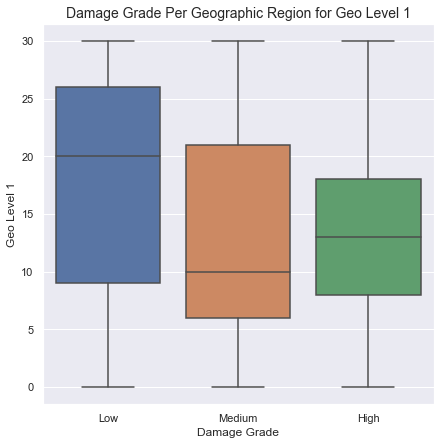

In [28]:
plot_box(train, 'geo_level_1_id', 'Geo Level 1','Damage Grade Per Geographic Region for Geo Level 1')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 1 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Pada tingkat geografis 1, sebanyak 75% bangunan yang mengalami tingkat kerusakan rendah berada pada tingkat geografis level 1 pada nilai 9 hingga 26, nilai 6 hingga 21 untuk tingkat kerusakan menengah, dan nilai 8 hingga 18 untuk tingkat kerusakan tinggi. Dikarenakan tingkat geografis level 1 adalah yang paling luas dibandingkan tingkat geografis yang lain, terlihat bahwa bangunan yang berada pada tingkat geografis level 1 pada nilai 8 hingga 18 lebih mengalami kerusakan dibandingkan pada nilai lainnya.

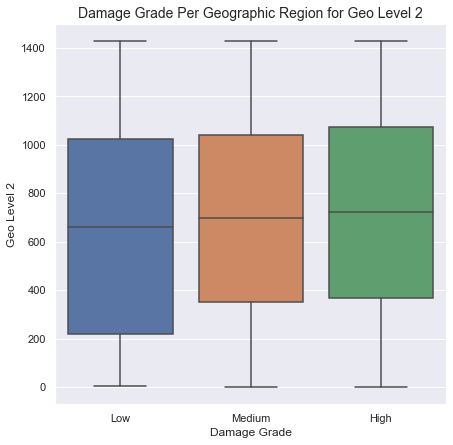

In [29]:
plot_box(train, 'geo_level_2_id', 'Geo Level 2','Damage Grade Per Geographic Region for Geo Level 2')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 2 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Pada tingkat geografis 2, sebanyak 75% bangunan yang mengalami tingkat kerusakan rendah berada pada tingkat geografis level 2 pada nilai 200 hingga 1100, nilai 350 hingga 1100 untuk tingkat kerusakan menengah, dan nilai 350 hingga 1100 untuk tingkat kerusakan tinggi. Dikarenakan tingkat geografis level 2 adalah tingkat geografis yang lebih sempit dibandingkan tingkat geografis 1, terlihat bahwa persebaran kerusaan bangunan yang berada pada tingkat geografis level 2 lebih mirip untuk ketiga tingkat kerusakan. 

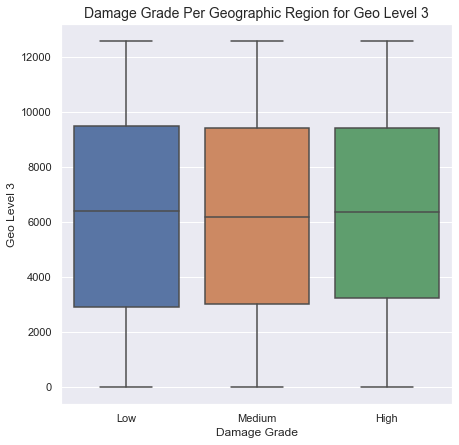

In [30]:
plot_box(train, 'geo_level_3_id', 'Geo Level 3','Damage Grade Per Geographic Region for Geo Level 3')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 2 memiliki tingkat kerusakan rendah, menengah, dan tinggi. Dikarenakan tingkat geografis level 3 adalah tingkat geografis yang lebih sempit dibandingkan tingkat geografis lainnya, bangunan pada tingkat geografis 3 memiliki tingkat kerusakan yang hampir sama pada semua nilainya.

## **Number of Floor and Damage Grade**

In [31]:
train['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

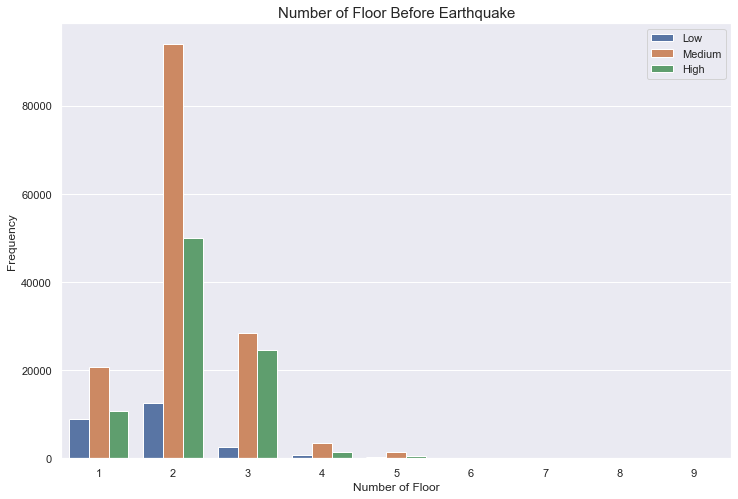

In [32]:
plt.figure(figsize=(12,8))

sns.countplot(train['count_floors_pre_eq'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Number of Floor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Number of Floor Before Earthquake', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Bangunan di Nepal yang mengalami kerusakan akibat gempa mempunyai jumlah lantai yang beragam dimulai dari bangunan dengan 1 lantai hingga 9 lantai. Adapun 3 jenis bangunan berdasarkan jumlah lantainya adalah bangunan 2 lantai, kemudian diikuti dengan 3 lantai dan 1 lantai. Diamati bahwa untuk bangunan yang memiliki 2 lantai mangalami tingkat kerusakan menengah, kemudian diikuti dengan tingkat kerusakan tinggi dan tingkat kerusakan rendah. Hal ini juga berlaku untuk bangunan yang memiliki 3 lantai dan 1 lantai.

## **Age and Damage Grade**

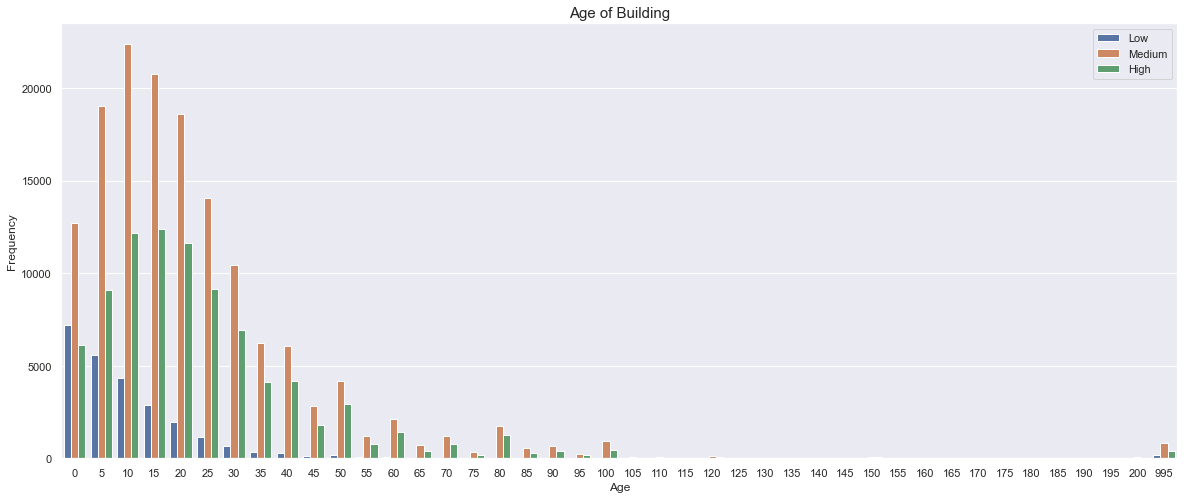

In [33]:
plt.figure(figsize=(20,8))

sns.countplot(train['age'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Pada gambar di atas, terlihat bahwa persebaran umur bangunan adalah pada rentang 0-200 tahun kemudian dilanjut dengan umur bangunan lebih dari 950 tahun. Oleh karena itu, akan dibagi plot di atas ke dalam 4 buah segmen yaitu pada range 0-50 tahun, 51-100 tahun, 101-150 tahun, dan lebih dari 150 tahun.

**Segment 1 (0 to 50 years old building)**

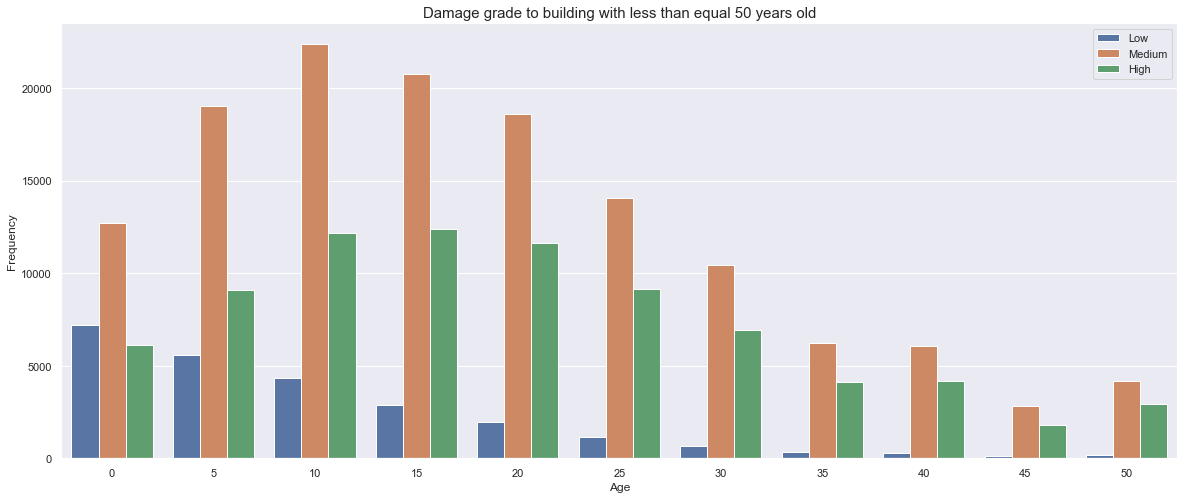

In [34]:
plt.figure(figsize=(20,8))

segment_1_age = train[train['age']<=50]
sns.countplot(segment_1_age['age'], hue=segment_1_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with less than equal 50 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 0 hingga 50 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 0 hingga 40 tahun terlihat bangunan dengan tingkat kerusakan ringan mengalami penurunan.

**Segment 2 (51 to 100 years old building)**

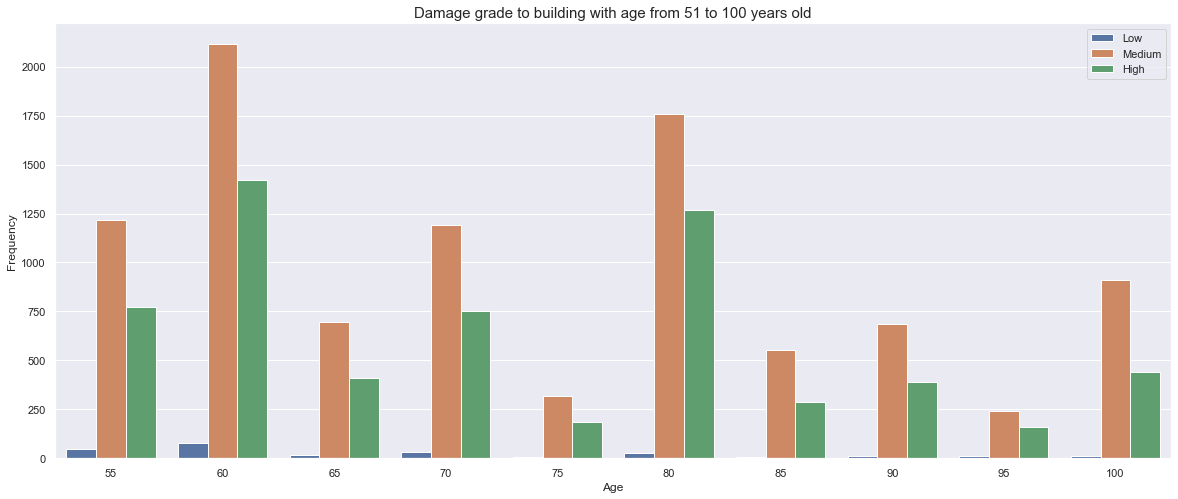

In [35]:
plt.figure(figsize=(20,8))

segment_2_age = train[(train['age']>50) & (train['age']<=100)]
sns.countplot(segment_2_age['age'], hue=segment_2_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 51 to 100 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 51 hingga 100 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 51 hingga 100, hanya ada sedikit bangunan yang mengalami tingkat kerusakan ringan.

**Segment 3 (101 to 150 years old building)**

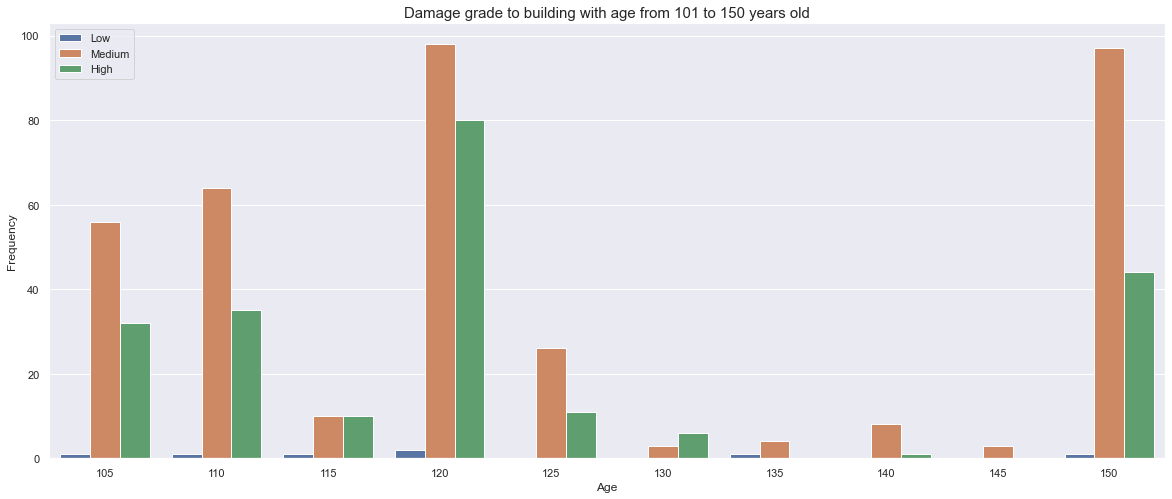

In [36]:
plt.figure(figsize=(20,8))

segment_3_age = train[(train['age']>100) & (train['age']<=150)]
sns.countplot(segment_3_age['age'], hue=segment_3_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 101 to 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Beberapa bangunan yang mempunyai umur antara 101 hingga 150 tahun mengalami tingkat kerusakan yang didominasi tingkat kerusakan mengengah dan tinggi.

**Segment 4 (150 to 1000 years old building)**

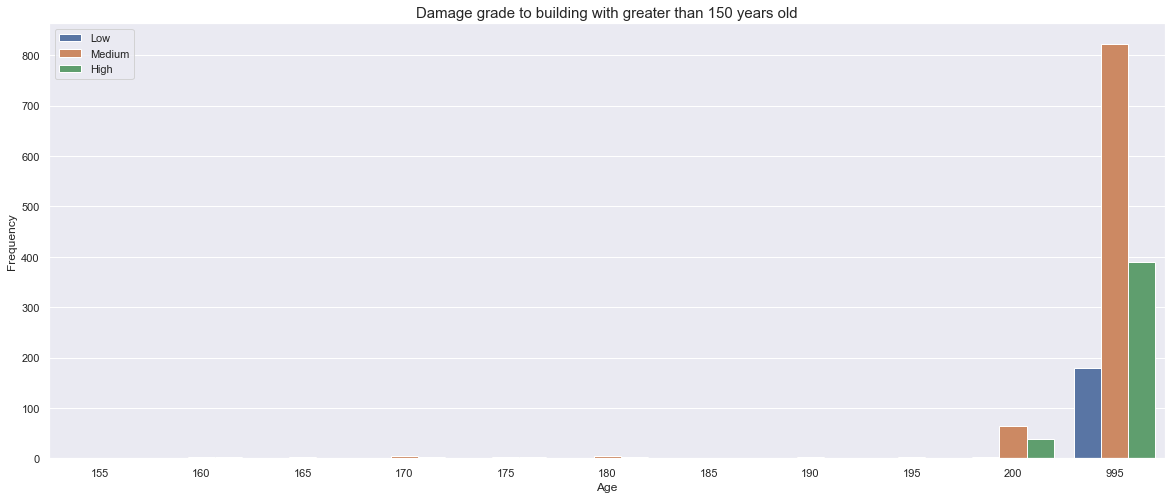

In [37]:
plt.figure(figsize=(20,8))

segment_4_age = train[train['age']>150]
sns.countplot(segment_4_age['age'], hue=segment_4_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with greater than 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Berdasarkan gambar di atas, terdapat bangunan yang mempunyai umur lebih dari 200 tahun dan mengalami tingkat kerusakan baik itu rendah, menengah, dan tinggi. Terdapat bangunan yang mempunyai umur sangat tua yaitu 995 tahun dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

## **Area Percentage and Damage Grade**

In [38]:
train['area_percentage'].unique()

array([  6,   8,   5,   9,   3,  13,   7,   4,  12,  16,  11,  27,  10,
        15,  14,  17,  21,  37,  19,   2,  28,  38,  56,   1,  20,  24,
        34,  26,  18,  31,  25,  23,  22,  32,  47,  36,  40,  29,  42,
        55,  35,  39, 100,  50,  51,  43,  30,  62,  85,  33,  45,  52,
        57,  49,  67,  66,  54,  75,  65,  58,  48,  64,  63,  46,  59,
        86,  78,  41,  44,  61,  70,  77,  73,  72,  53,  60,  84,  83,
        76,  96,  80,  90,  82,  69], dtype=int64)

In [39]:
train['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
55         1
80         1
90         1
82         1
100        1
Name: area_percentage, Length: 84, dtype: int64

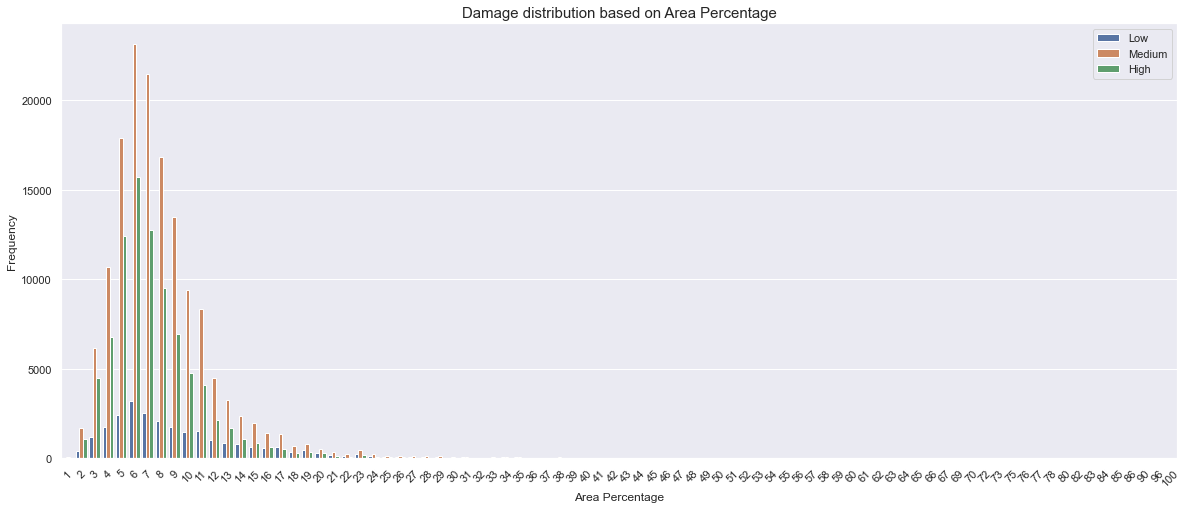

In [40]:
plt.figure(figsize=(20,8))

sns.countplot(train['area_percentage'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Area Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Area Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Terlihat bahwa banyak bangunan yang ada di Nepal memiliki luas area atau *area percentage* dari 1 hingga 20 $m^2$ dan mayoritas mengalami tingkat kerusakan menengah akibat gempa.

## **Height Percentage and Damage Grade**

In [41]:
train['height_percentage'].unique()

array([ 5,  7,  9,  4,  6,  3, 10,  8,  2, 32, 12, 11, 13, 16, 15, 18, 26,
       17, 19, 14, 20, 23, 21, 25, 24, 28, 31], dtype=int64)

In [42]:
train['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

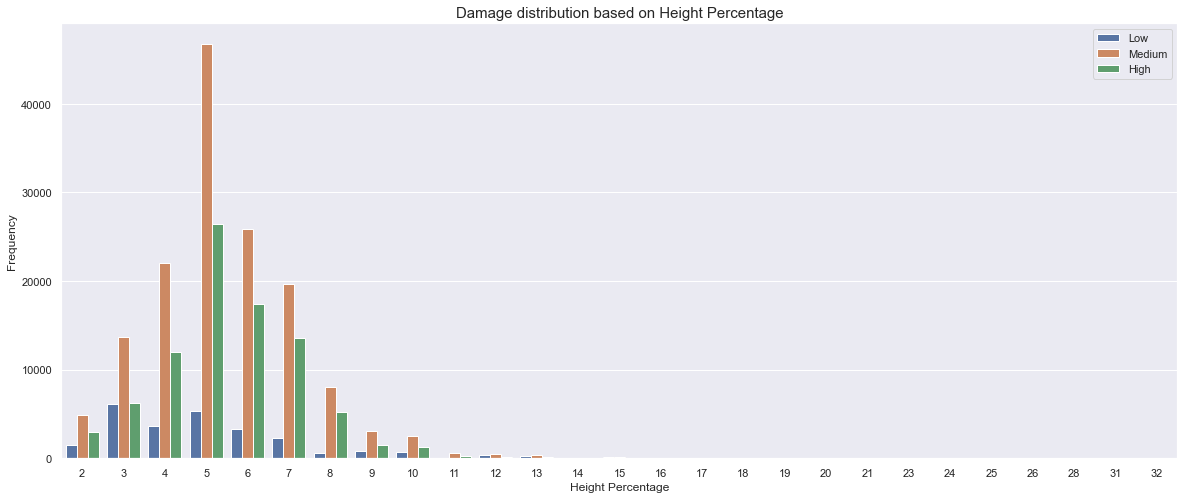

In [43]:
plt.figure(figsize=(20,8))

sns.countplot(train['height_percentage'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Height Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Height Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Untuk tinggi bangunan sendiri berada pada rentang 2 hingga 10 $m$ dan mengalami tingkat kerusakan menengah akibat gempa.

## **Count Families and Damage Grade**

In [44]:
train['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

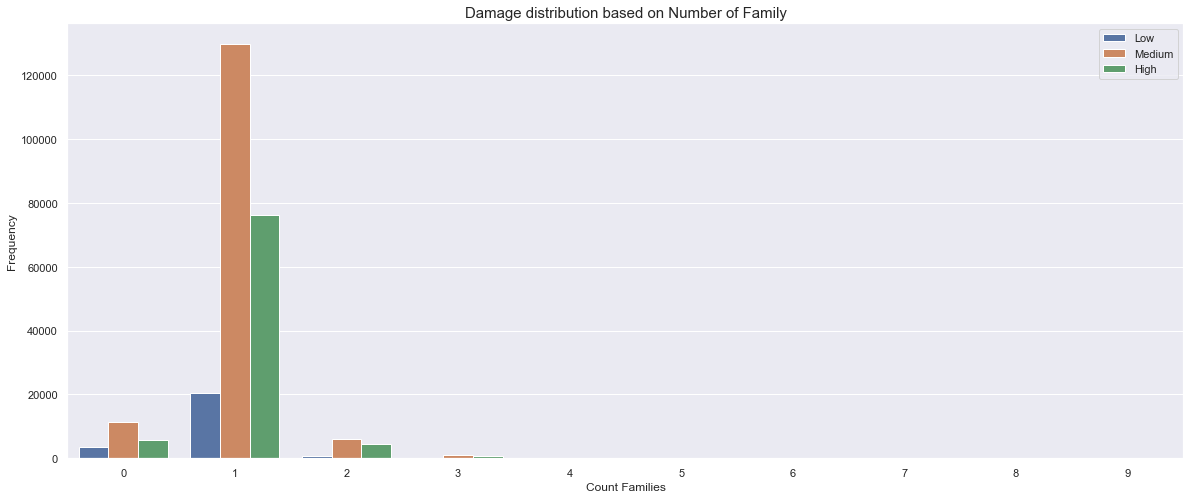

In [45]:
plt.figure(figsize=(20,8))

sns.countplot(train['count_families'], hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Count Families', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Number of Family', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Mayoritas bangunan di Nepal yang terkena dampak dari gempa bumi dihuni oleh 0-2 orang. Untuk bangunan dengan 0 orang menyatakan bahwa bangunan tersebut bukanlah bangunan pribadi melainkan fasilitas umum yang tidak ditinggali untuk kehidupan sehari-hari.

## **Categorical Feature and Damage Grade**

In [46]:
def cat_plot(data, col_x, x_label, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    sns.countplot(data[col_x], hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution based on {}'.format(x_label), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Land Surface Condition and Damage Grade**

In [47]:
train['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

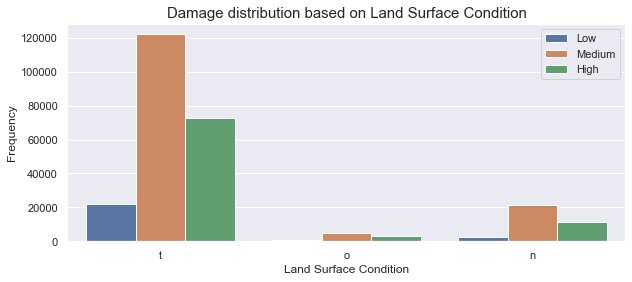

In [48]:
cat_plot(train, 'land_surface_condition', 'Land Surface Condition')

Berdasarkan gambar di atas, bangunan yang ada di nepal mempunyai kondisi permukaan tanah bangunan `t` dan permukaan tanah  ini memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Foundation Type and Damage Grade**

In [49]:
train['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

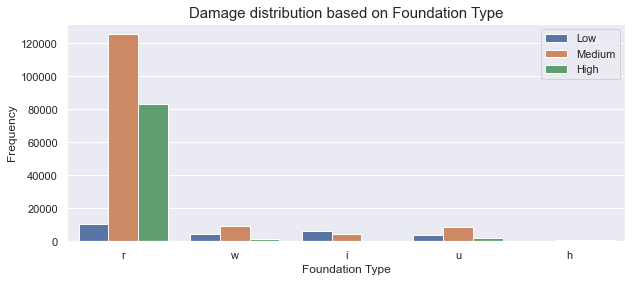

In [50]:
cat_plot(train, 'foundation_type', 'Foundation Type')

Berdasarkan gambar di atas, bangunan dengan tipe pondasi `r` memiliki jumlah terbanyak dan memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Roof Type and Damage Grade**

In [51]:
train['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

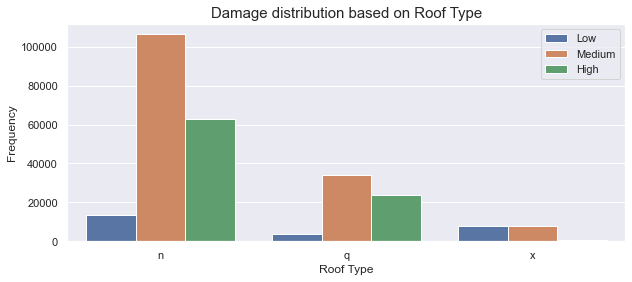

In [52]:
cat_plot(train, 'roof_type', 'Roof Type')

**Ground Floor Type and Damage Grade**

In [53]:
train['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

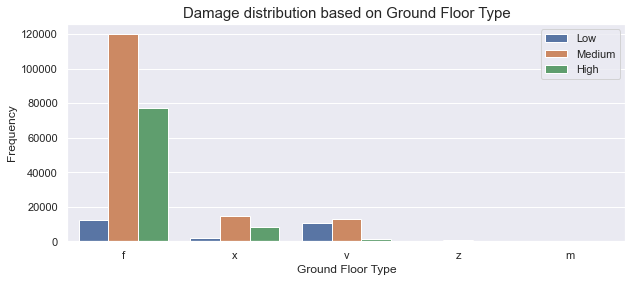

In [54]:
cat_plot(train, 'ground_floor_type', 'Ground Floor Type')

Bangunan dengan jenis lantai yang digunakan pada lantai dasar bangunan bertipe `f` memiliki jumlah terbanyak dan memiliki pengaruh terhadap tingkat kerusakan yang terjadi pada bangunan.

**Other Floor Type and Damage Grade**

In [55]:
train['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

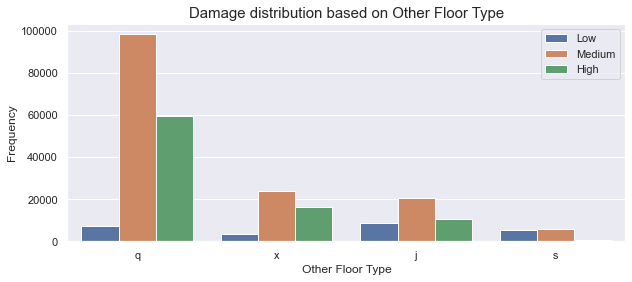

In [56]:
cat_plot(train, 'other_floor_type', 'Other Floor Type')

Bangunan dengan jenis lantai yang digunakan pada lantai lain banyak menggunakan lantai bertipe `q` dan mayoritas diantaranya mengalami tingkat kerusakan menengah dan tinggi.

**Position and Damage Grade**

In [57]:
train['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

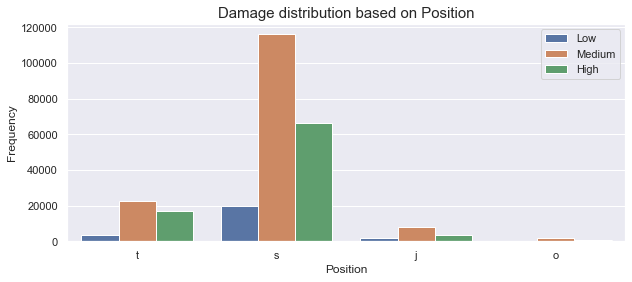

In [58]:
cat_plot(train, 'position', 'Position')

Bangunan yang berada di Nepal kebanyakan menggunakan posisi bertipe `s` dan mayoritas mengalami tingkat kerusakan menengah akibat gempa.

**Plan Configuration and Damage Grade**

In [59]:
train['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

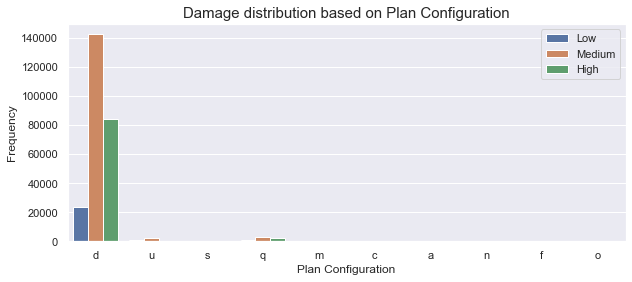

In [60]:
cat_plot(train, 'plan_configuration', 'Plan Configuration')

*Plan configuration* yang ada pada bangunan di Nepal didominasi `d` dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

**Legal Ownership Status**

In [61]:
train['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

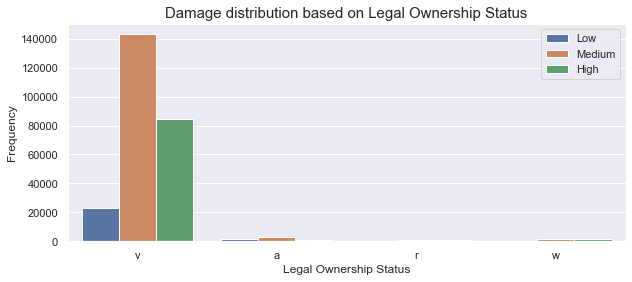

In [62]:
cat_plot(train, 'legal_ownership_status', 'Legal Ownership Status')

Status kepemilikan bangunan didominasi oleh `v` dan banyak diantaranya yang mengalami tingkat kerusakan menengah.

## **Numerical Feature (Binary) and Damage Grade**

In [63]:
def count_plot(data, col_x, x_label, title, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    p = sns.countplot(data[col_x], hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    p.set_xticklabels(['No', 'Yes'])
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution that has {}'.format(title), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Has Superstructure Adobe Mud**

In [64]:
train['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

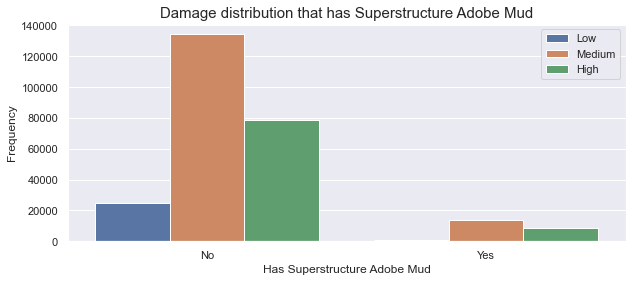

In [65]:
count_plot(train, 'has_superstructure_adobe_mud', 'Has Superstructure Adobe Mud', 'Superstructure Adobe Mud')

**Has Superstructure Mud Mortar Stone**

In [66]:
train['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

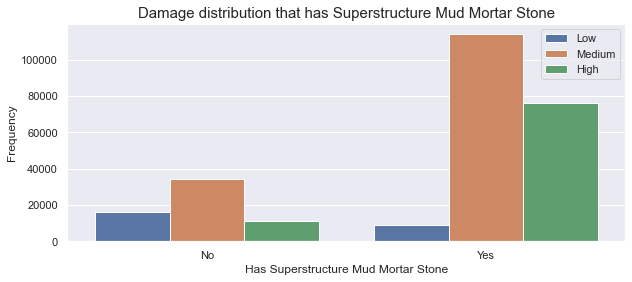

In [67]:
count_plot(train, 'has_superstructure_mud_mortar_stone', 'Has Superstructure Mud Mortar Stone', 'Superstructure Mud Mortar Stone')

**Has Superstructure Stone Flag**

In [68]:
train['has_superstructure_stone_flag'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

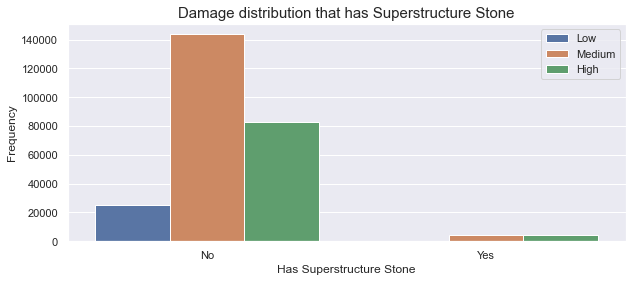

In [69]:
count_plot(train, 'has_superstructure_stone_flag', 'Has Superstructure Stone', 'Superstructure Stone')

**Has Superstructure Cement Mortar Stone**

In [70]:
train['has_superstructure_cement_mortar_stone'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

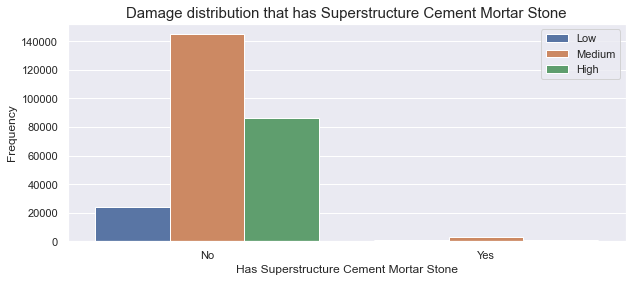

In [71]:
count_plot(train, 'has_superstructure_cement_mortar_stone', 'Has Superstructure Cement Mortar Stone', 'Superstructure Cement Mortar Stone')

**Has Superstructure Mud Mortar Brick**

In [72]:
train['has_superstructure_mud_mortar_brick'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

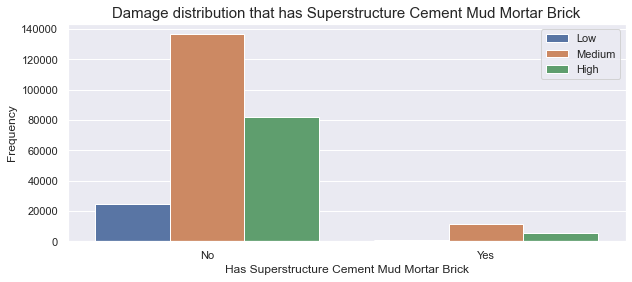

In [73]:
count_plot(train, 'has_superstructure_mud_mortar_brick', 'Has Superstructure Cement Mud Mortar Brick', 'Superstructure Cement Mud Mortar Brick')

**Has Superstructure Cement Mortar Brick**

In [74]:
train['has_superstructure_cement_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

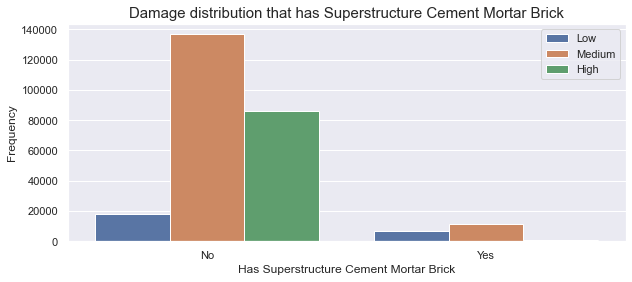

In [75]:
count_plot(train, 'has_superstructure_cement_mortar_brick', 'Has Superstructure Cement Mortar Brick', 'Superstructure Cement Mortar Brick')

**Has Superstructure Timber**

In [76]:
train['has_superstructure_timber'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

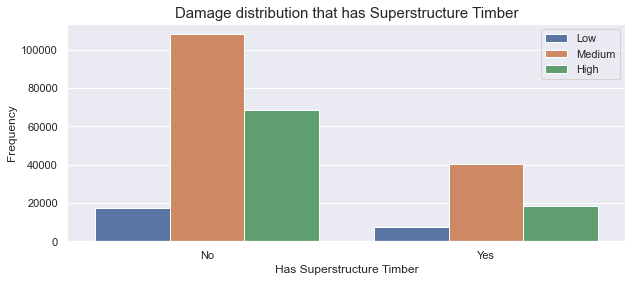

In [77]:
count_plot(train, 'has_superstructure_timber', 'Has Superstructure Timber', 'Superstructure Timber')

**Has Superstructure Bamboo**

In [78]:
train['has_superstructure_bamboo'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

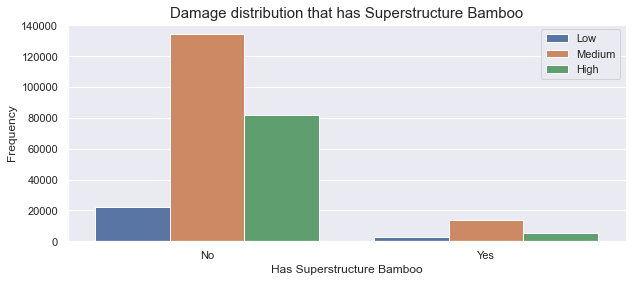

In [79]:
count_plot(train, 'has_superstructure_bamboo', 'Has Superstructure Bamboo', 'Superstructure Bamboo')

**Has Superstructure RC Non Engineered**

In [80]:
train['has_superstructure_rc_non_engineered'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

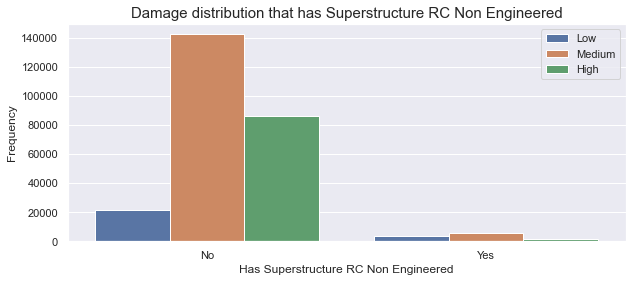

In [81]:
count_plot(train, 'has_superstructure_rc_non_engineered', 'Has Superstructure RC Non Engineered', 'Superstructure RC Non Engineered')

**Has Superstructure RC Engineered**

In [82]:
train['has_superstructure_rc_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

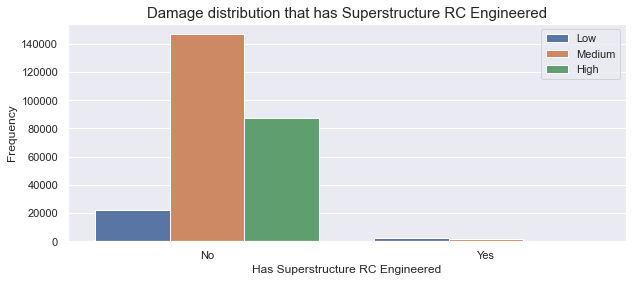

In [83]:
count_plot(train, 'has_superstructure_rc_engineered', 'Has Superstructure RC Engineered', 'Superstructure RC Engineered')

**Has Superstructure Other**

In [84]:
train['has_superstructure_other'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

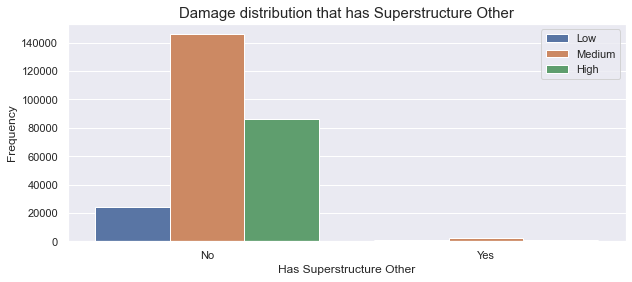

In [85]:
count_plot(train, 'has_superstructure_other', 'Has Superstructure Other', 'Superstructure Other')

Pada bangunan yang ada di Nepal, superstruktur yang banyak digunakan pada bangunan adalah superstruktur campuran antara *Mud Mortar Stone* atau superstruktur dari *Timber*. Pada bangunan yang menggunakan superstruktur tersebut kebanyakan mengalami tingkat kerusakan menengah kemudian disusul dengna tingkat kerusakan tinggi.

**Has Secondary Use**

In [86]:
train['has_secondary_use'].value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

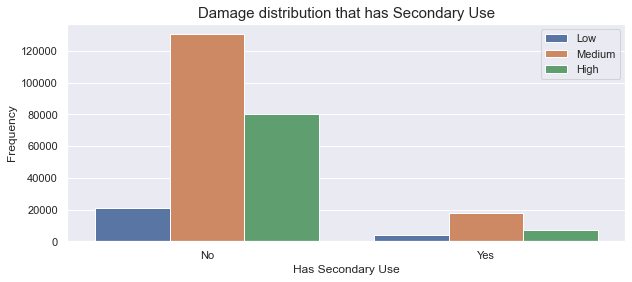

In [87]:
count_plot(train, 'has_secondary_use', 'Has Secondary Use', 'Secondary Use')

**Has Secondary Use Agriculture**

In [88]:
train['has_secondary_use_agriculture'].value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

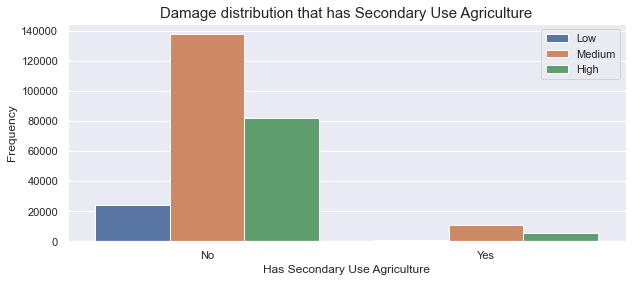

In [89]:
count_plot(train, 'has_secondary_use_agriculture', 'Has Secondary Use Agriculture', 'Secondary Use Agriculture')

**Has Secondary Use Hotel**

In [90]:
train['has_secondary_use_hotel'].value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

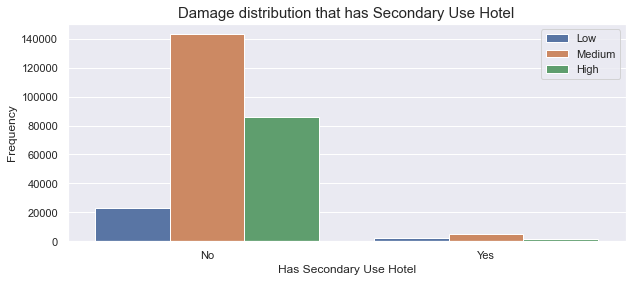

In [91]:
count_plot(train, 'has_secondary_use_hotel', 'Has Secondary Use Hotel', 'Secondary Use Hotel')

**Has Secondary Use Rental**

In [92]:
train['has_secondary_use_rental'].value_counts()

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

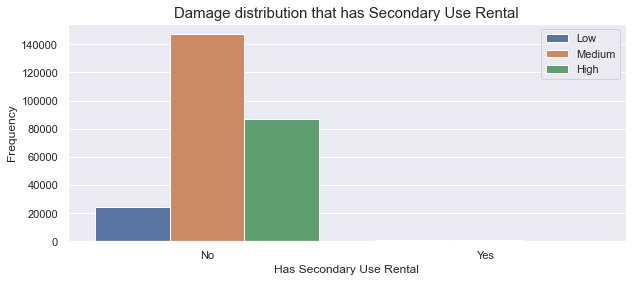

In [93]:
count_plot(train, 'has_secondary_use_rental', 'Has Secondary Use Rental', 'Secondary Use Rental')

**Has Secondary Use Institution**

In [94]:
train['has_secondary_use_institution'].value_counts()

0    260356
1       245
Name: has_secondary_use_institution, dtype: int64

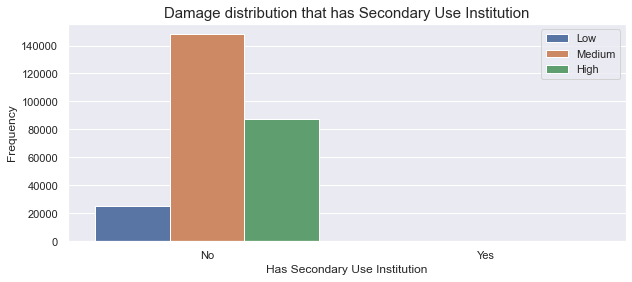

In [95]:
count_plot(train, 'has_secondary_use_institution', 'Has Secondary Use Institution', 'Secondary Use Institution')

**Has Secondary Use School**

In [96]:
train['has_secondary_use_school'].value_counts()

0    260507
1        94
Name: has_secondary_use_school, dtype: int64

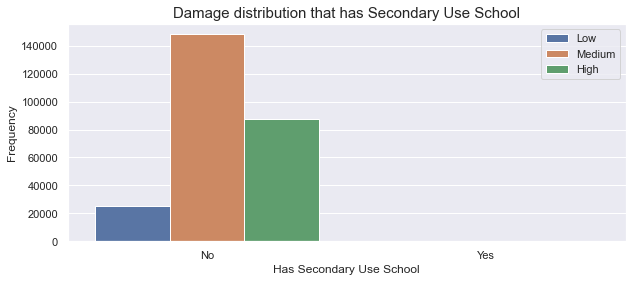

In [97]:
count_plot(train, 'has_secondary_use_school', 'Has Secondary Use School', 'Secondary Use School')

**Has Secondary User Industry**

In [98]:
train['has_secondary_use_industry'].value_counts()

0    260322
1       279
Name: has_secondary_use_industry, dtype: int64

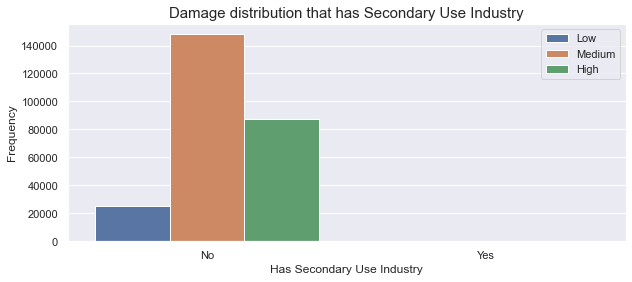

In [99]:
count_plot(train, 'has_secondary_use_industry', 'Has Secondary Use Industry', 'Secondary Use Industry')

**Has Secondary Use Health Post**

In [100]:
train['has_secondary_use_health_post'].value_counts()

0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64

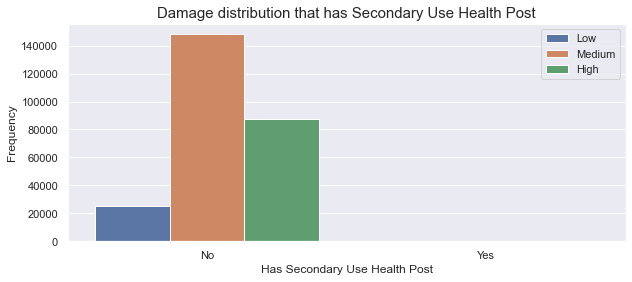

In [101]:
count_plot(train, 'has_secondary_use_health_post', 'Has Secondary Use Health Post', 'Secondary Use Health Post')

**Has Secondary Use Goverment Office**

In [102]:
train['has_secondary_use_gov_office'].value_counts()

0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64

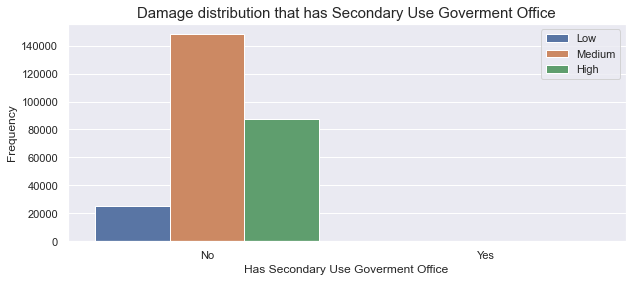

In [103]:
count_plot(train, 'has_secondary_use_gov_office', 'Has Secondary Use Goverment Office', 'Secondary Use Goverment Office')

**Has Secondary Use Police**

In [104]:
train['has_secondary_use_use_police'].value_counts()

0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64

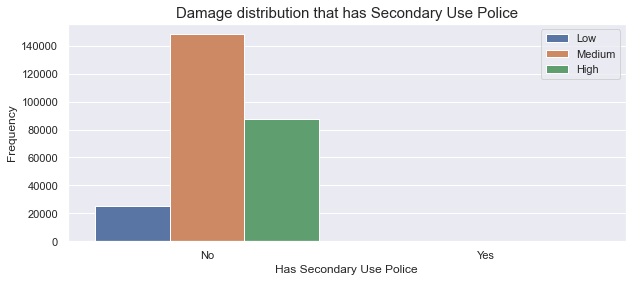

In [105]:
count_plot(train, 'has_secondary_use_use_police', 'Has Secondary Use Police', 'Secondary Use Police')

**Has Secondary Use Other**

In [106]:
train['has_secondary_use_other'].value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

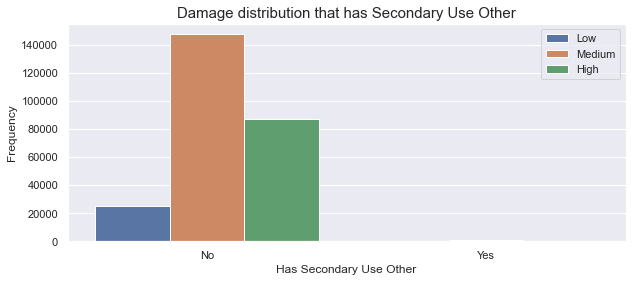

In [107]:
count_plot(train, 'has_secondary_use_other', 'Has Secondary Use Other', 'Secondary Use Other')

Selain bangunan untuk tujuan pribadi, banyak bangunan di Nepal yang digunakan untuk tujuan pertanian, hotel, penyewaan, institusi, sekolah, pos kesehatan, kantor pemerintahan, kantor polisi, dan tujuan lainnya. Bangunan yang mempunyai tujuan sekunder sebagai sarana pertanian dan hotel merupakan dua sektor dengan jumlah bangunan terbanyak dibandingkan dengan bangunan dengan tujuan sekunder lain. Kebanyakan bangunan dengan tujuan sekunder pertanian dan hotel mengalami tingkat kerusakan menengah.

## **Facetgrid**

In [108]:
def facet_plot(data, col, x, x_label):
    grid = sns.FacetGrid(data, col=col, row='damage_grade', size=4, aspect=2, sharey=False)
    grid.map(plt.hist, x, bins=20)
    grid.set_xlabels(x_label)
    grid.set_ylabels('Frequency')
    plt.show()

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Number of Floor**

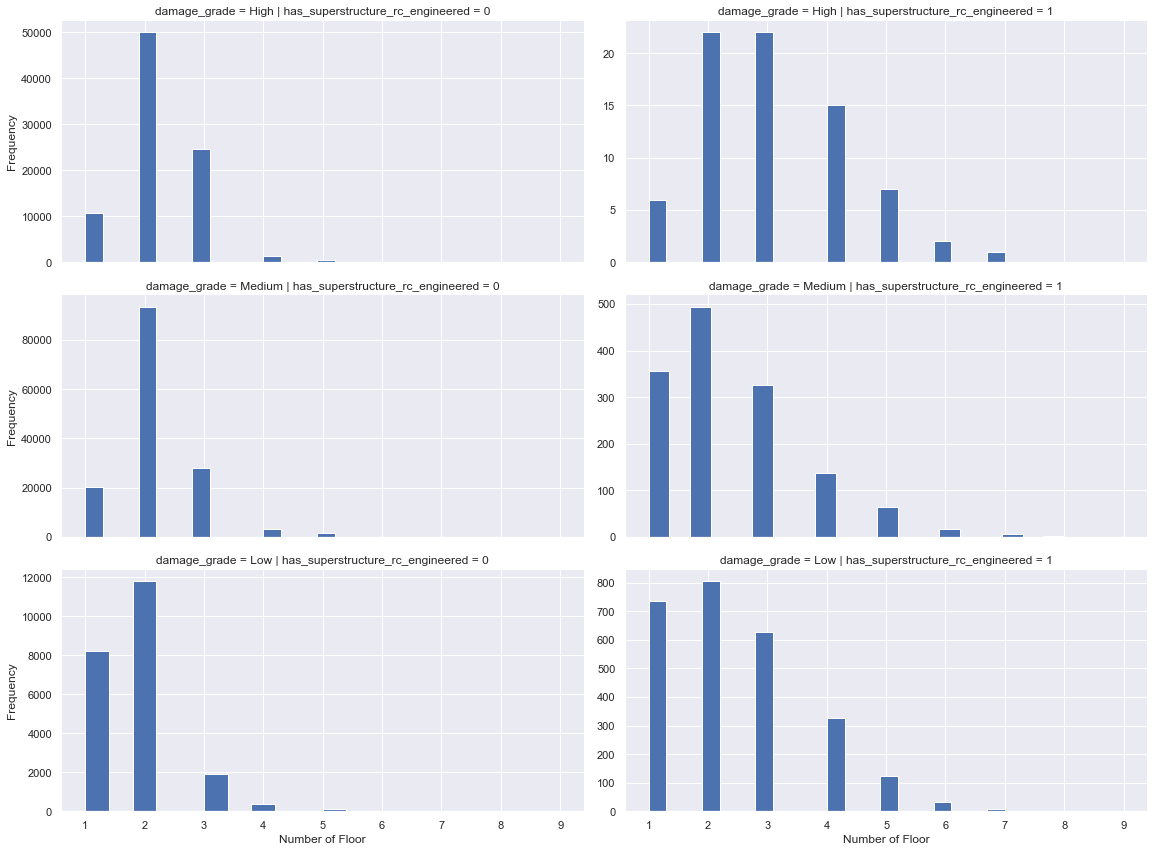

In [109]:
facet_plot(train, 'has_superstructure_rc_engineered', 'count_floors_pre_eq', 'Number of Floor')

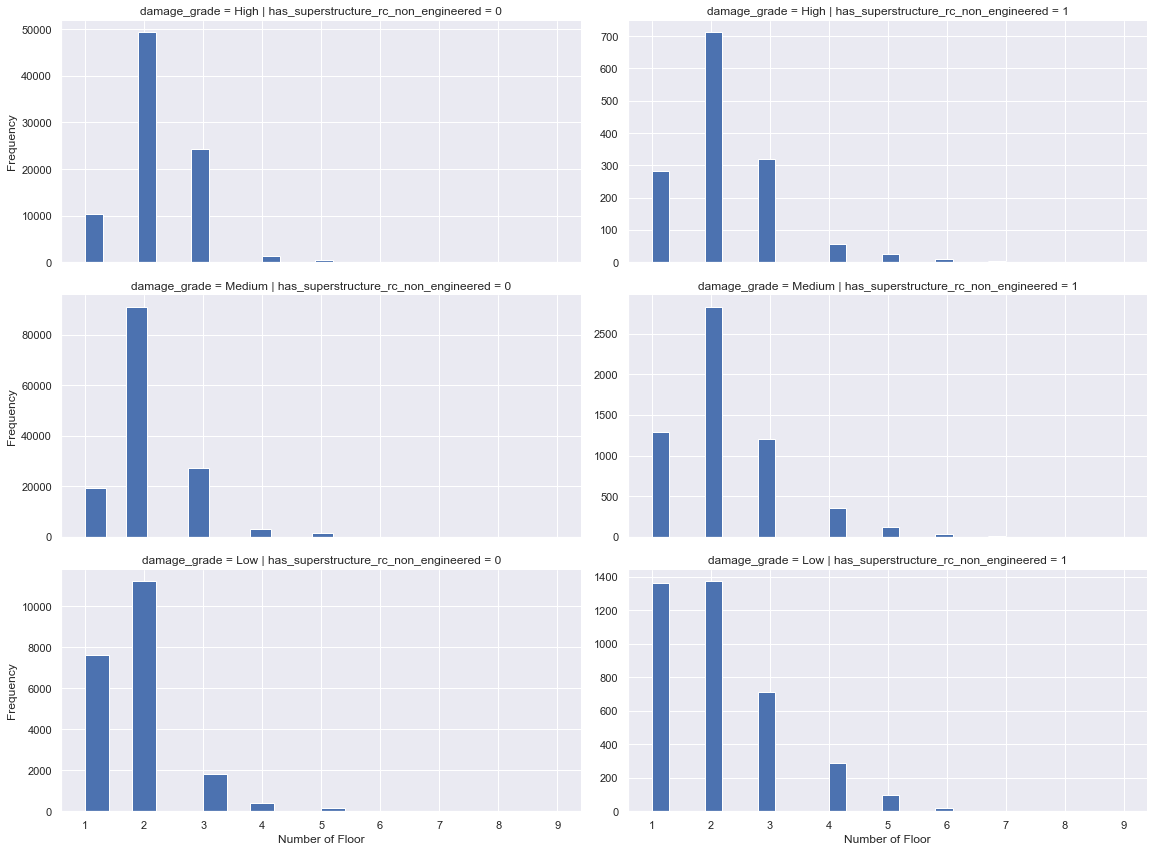

In [110]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'count_floors_pre_eq', 'Number of Floor')

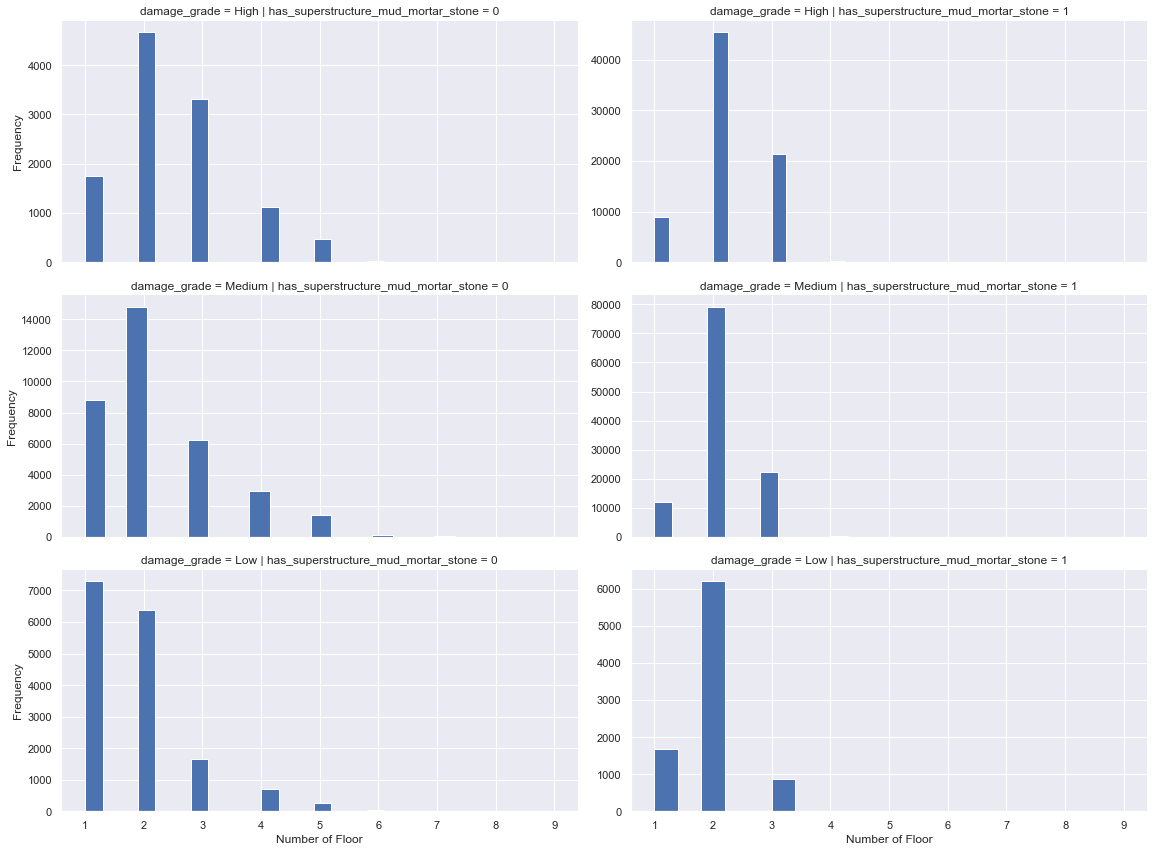

In [111]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'count_floors_pre_eq', 'Number of Floor')

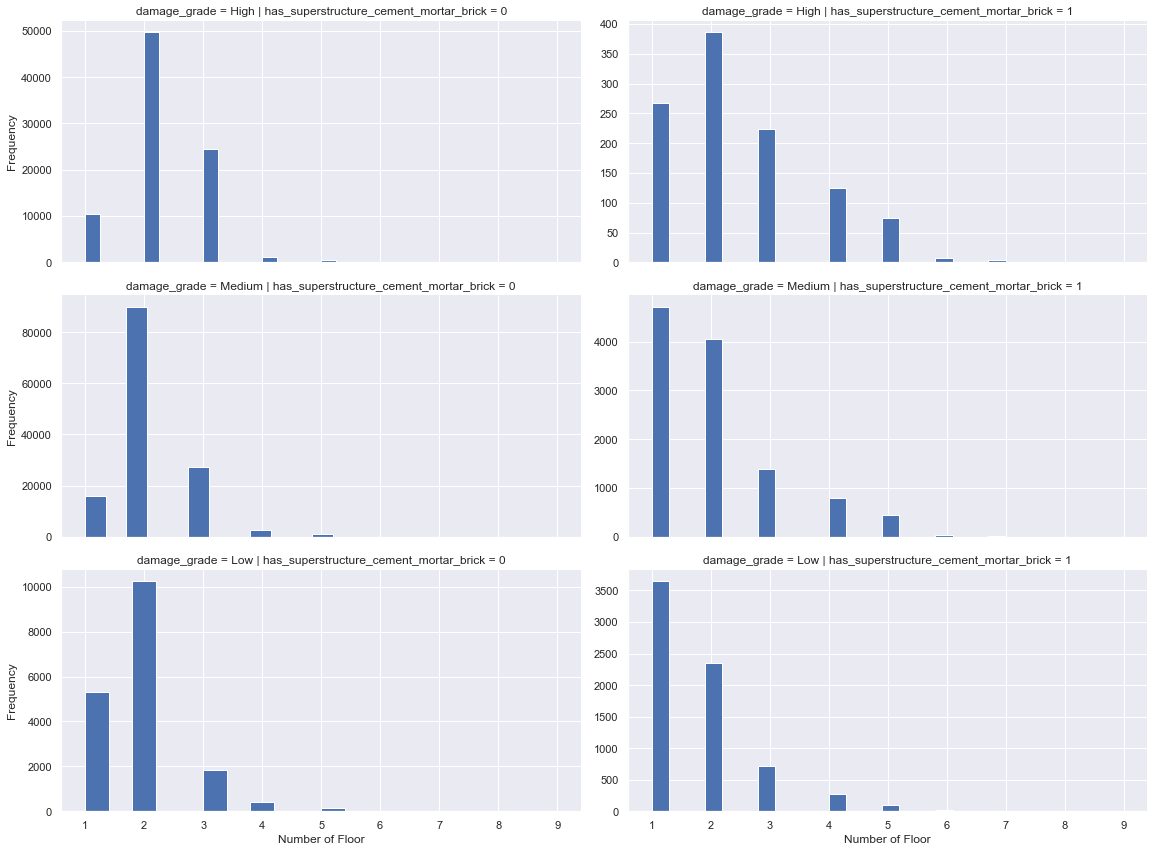

In [112]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'count_floors_pre_eq', 'Number of Floor')

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Height Percentage**

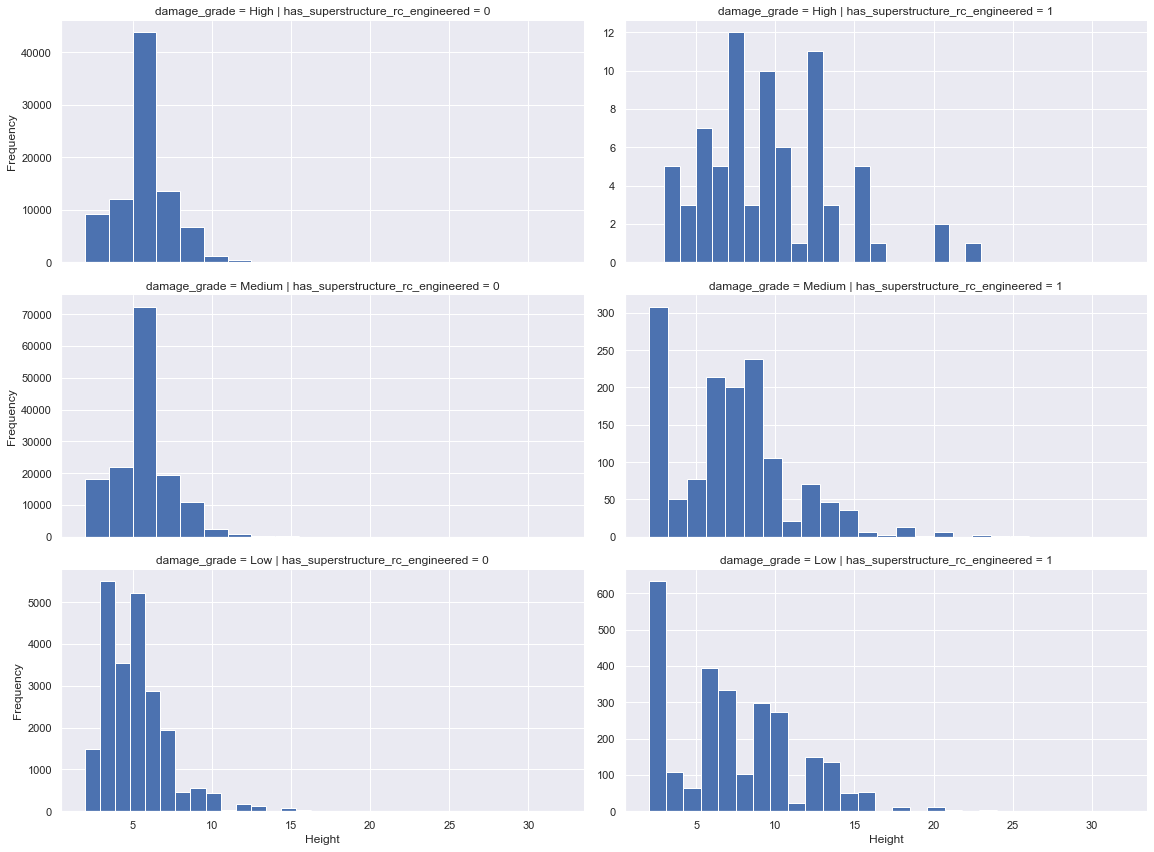

In [113]:
facet_plot(train, 'has_superstructure_rc_engineered', 'height_percentage', 'Height')

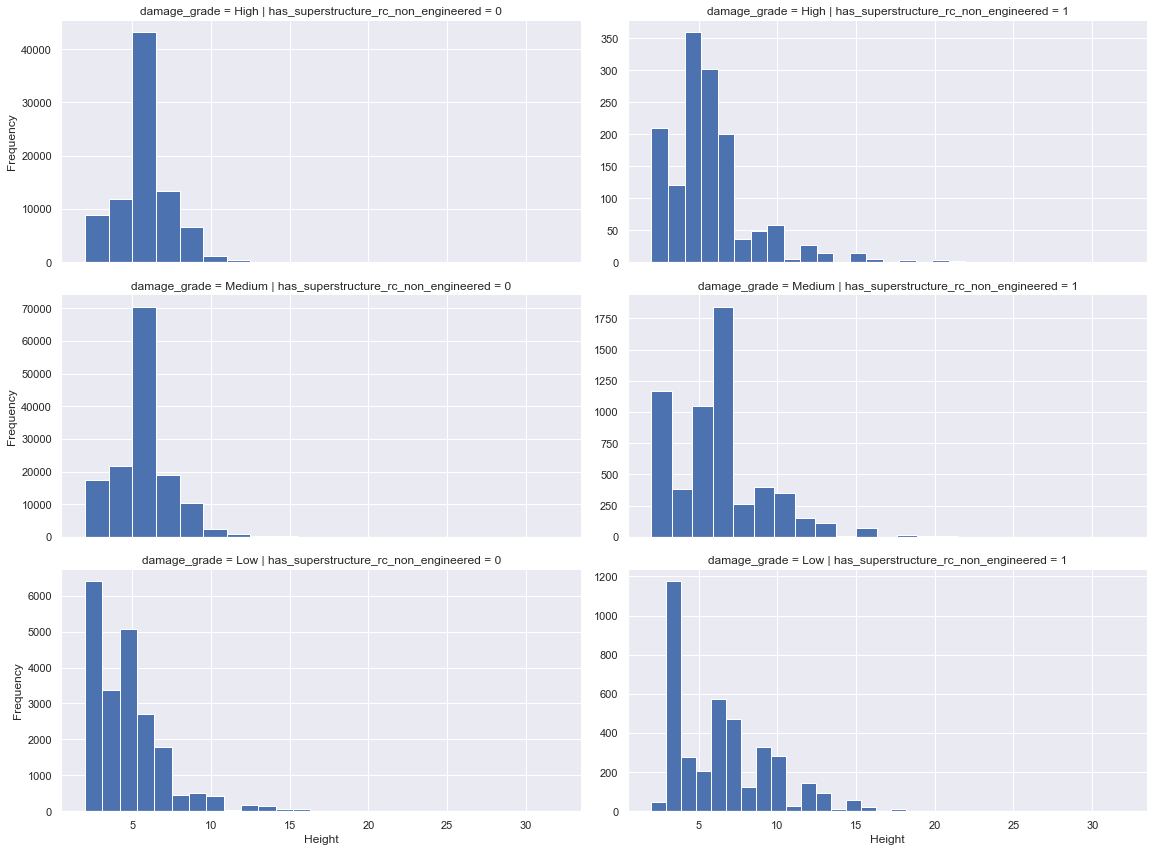

In [114]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'height_percentage', 'Height')

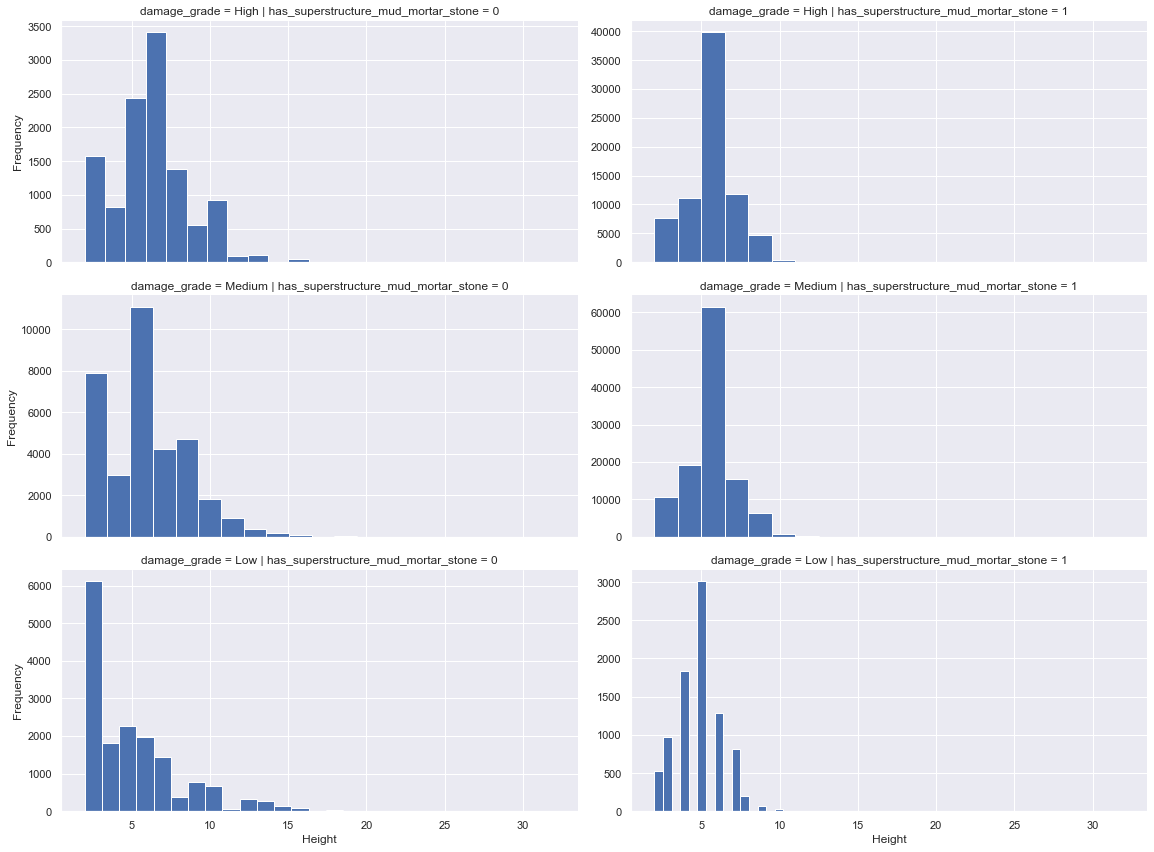

In [115]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'height_percentage', 'Height')

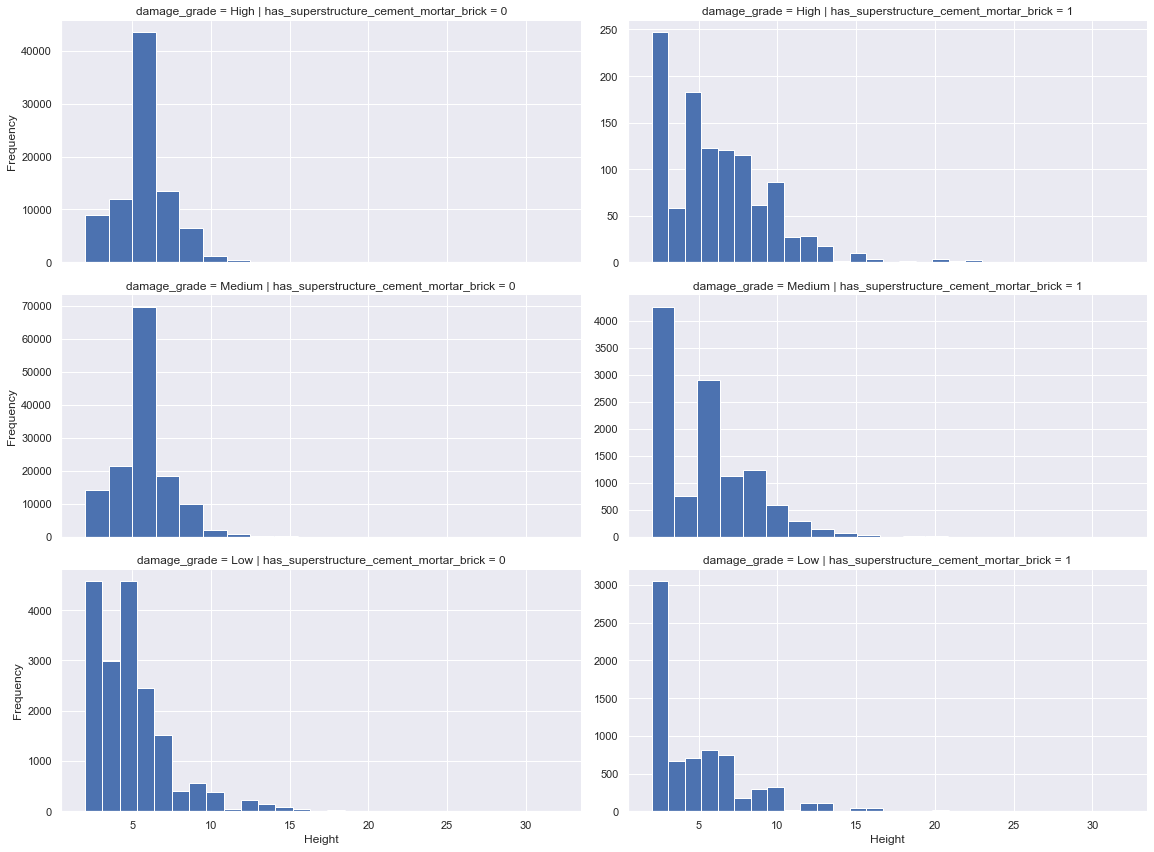

In [116]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'height_percentage', 'Height')

### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Area Percentage**

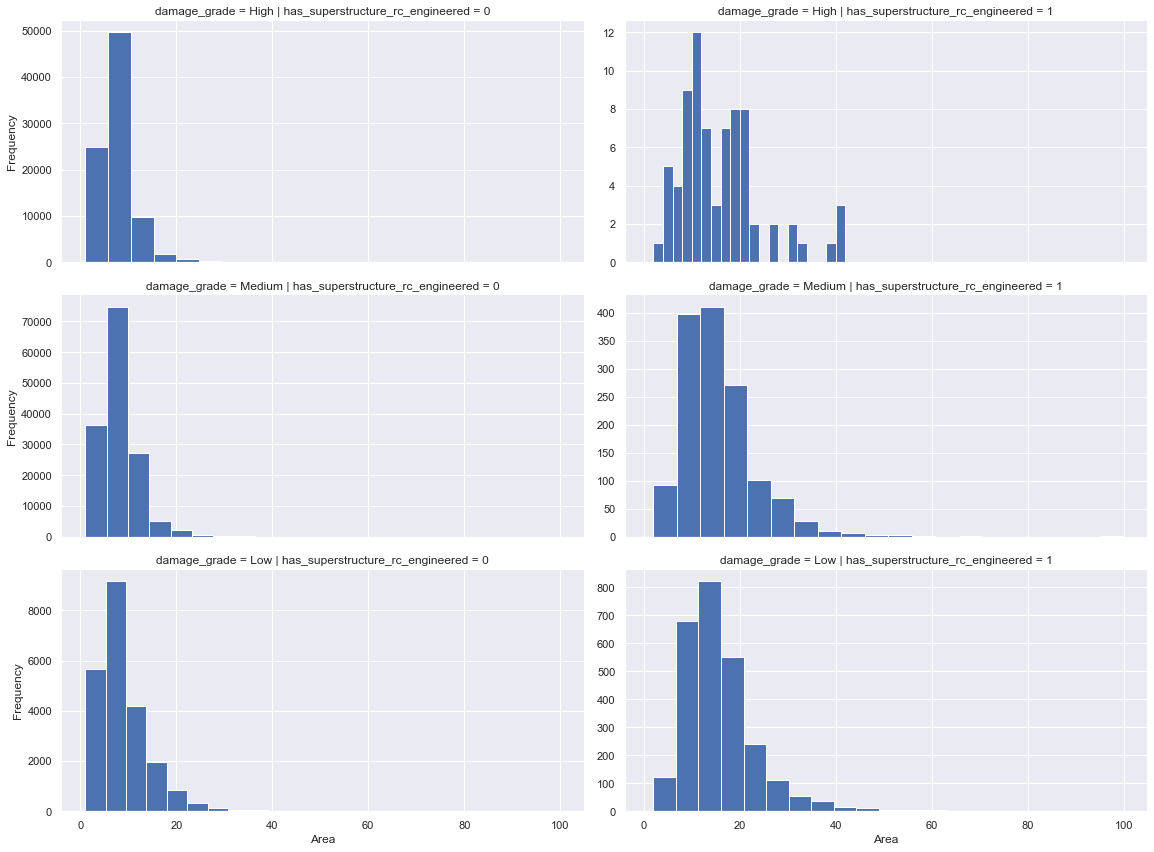

In [117]:
facet_plot(train, 'has_superstructure_rc_engineered', 'area_percentage', 'Area')

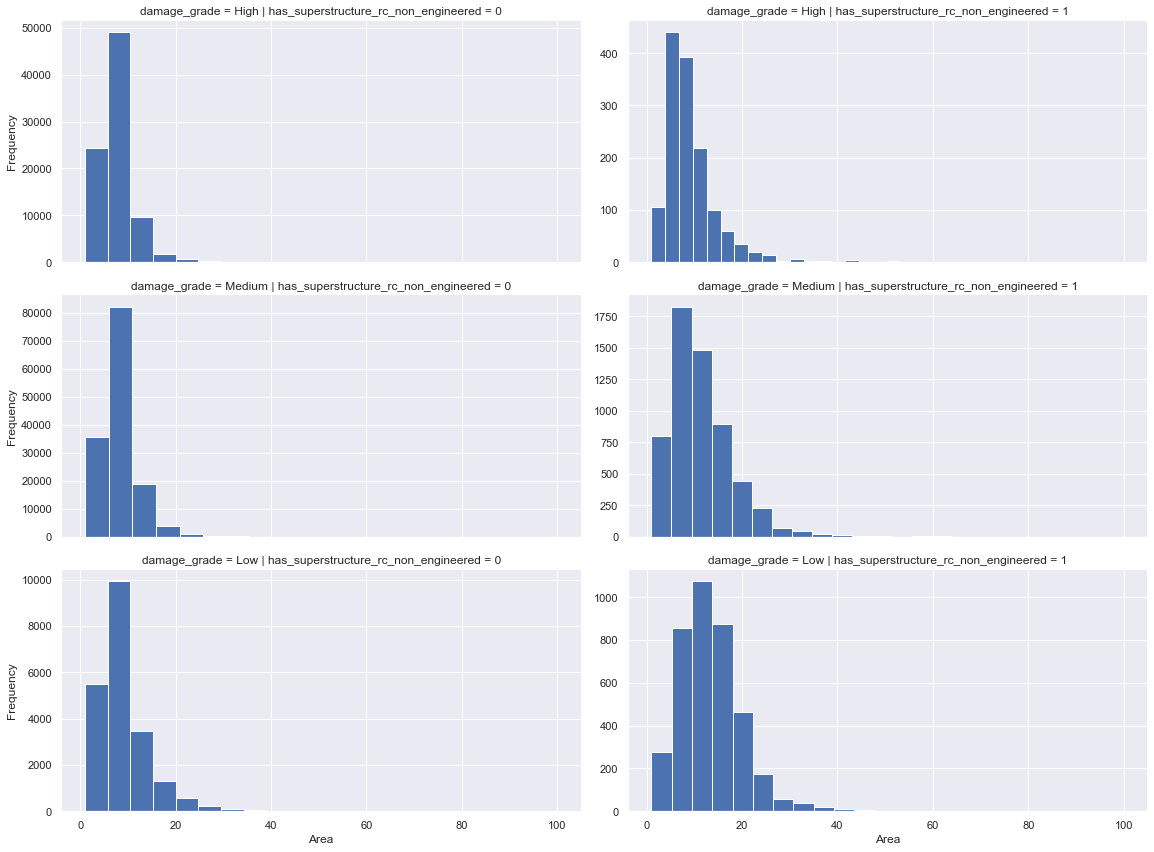

In [118]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'area_percentage', 'Area')

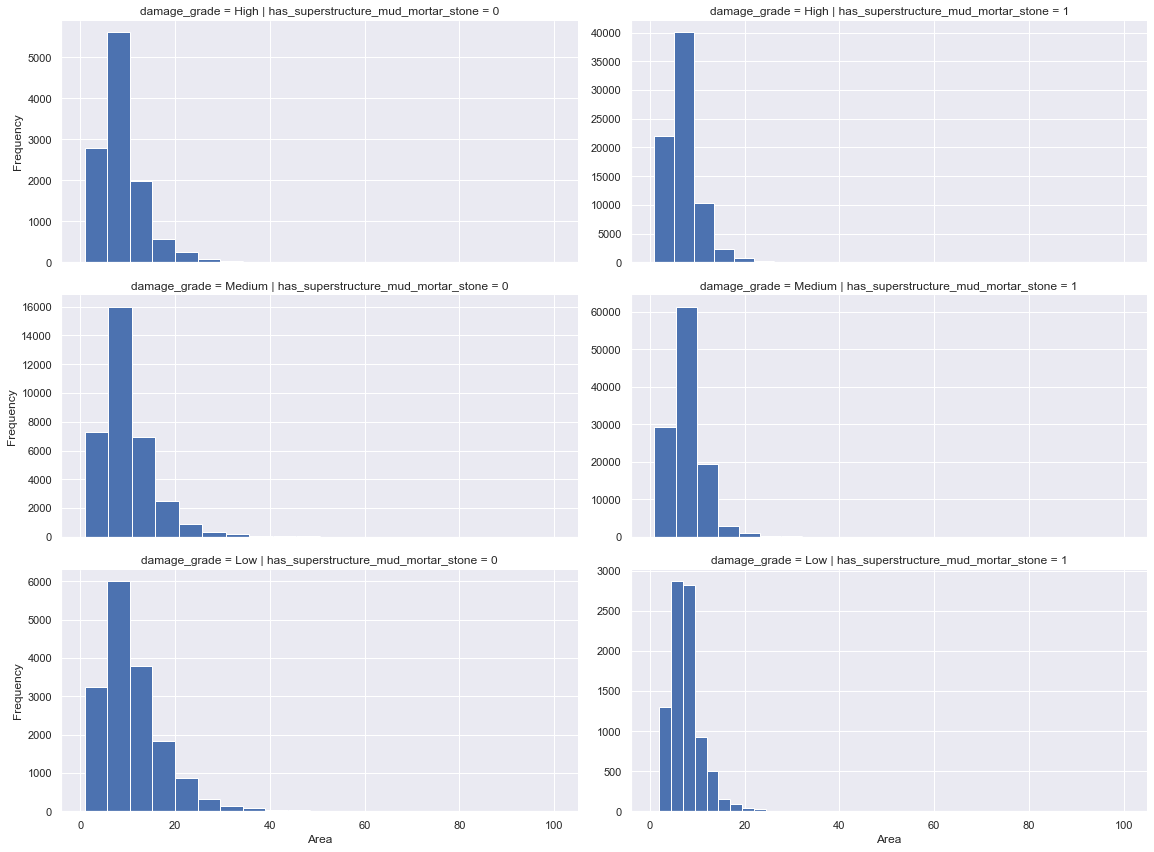

In [119]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'area_percentage', 'Area')

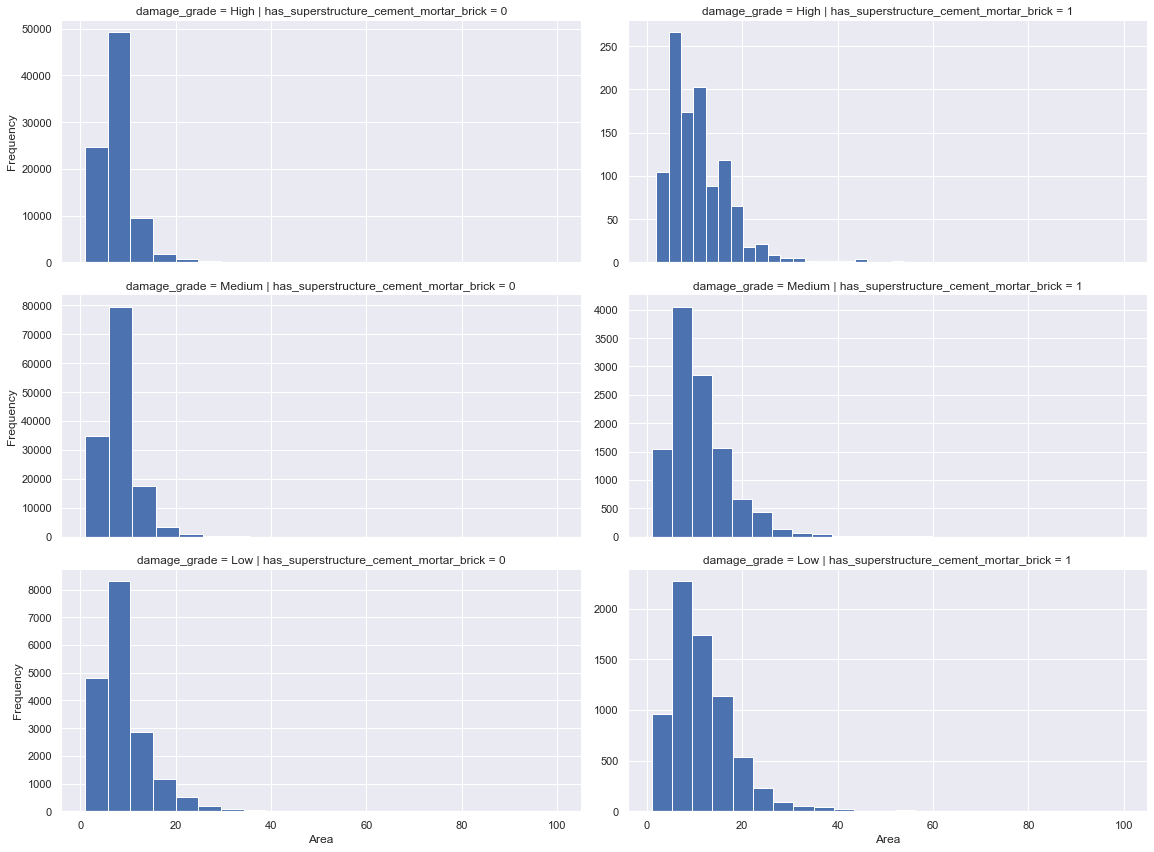

In [120]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'area_percentage', 'Area')

## **Multivariate Analysis**

In [121]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [122]:
features = train.copy()

In [123]:
features['damage_grade'] = features['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
features['damage_grade'] = features['damage_grade'].astype('int64')

In [124]:
corr_matrix = features.corr()
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,...,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,...,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,...,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,...,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,...,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,...,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628,0.291325


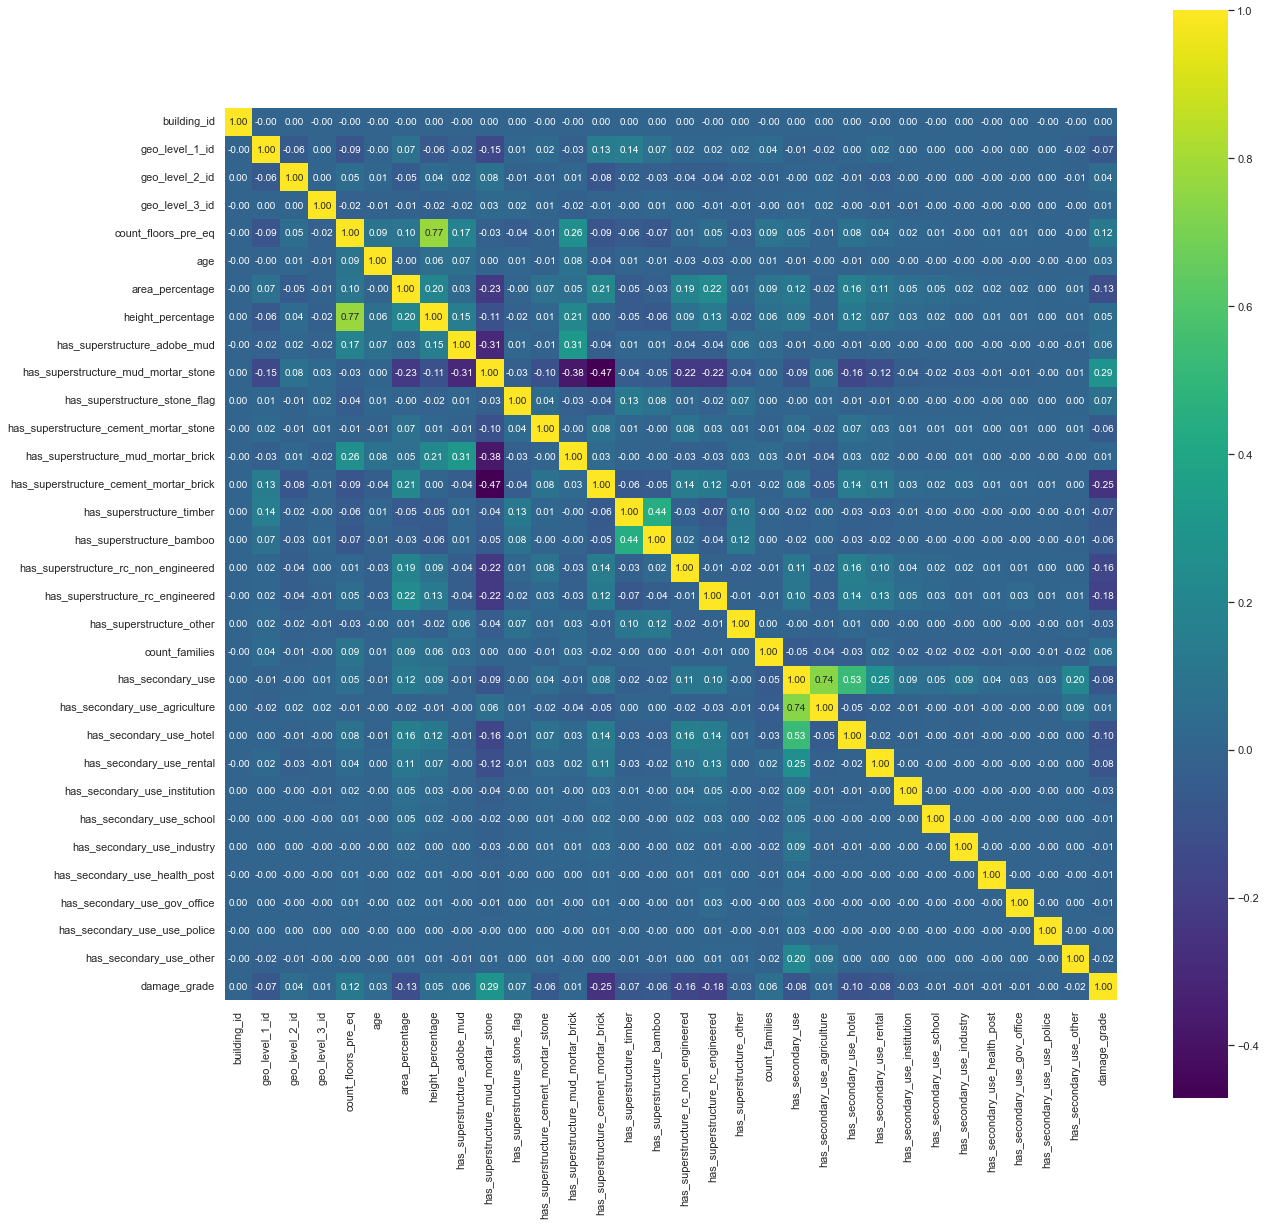

In [125]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

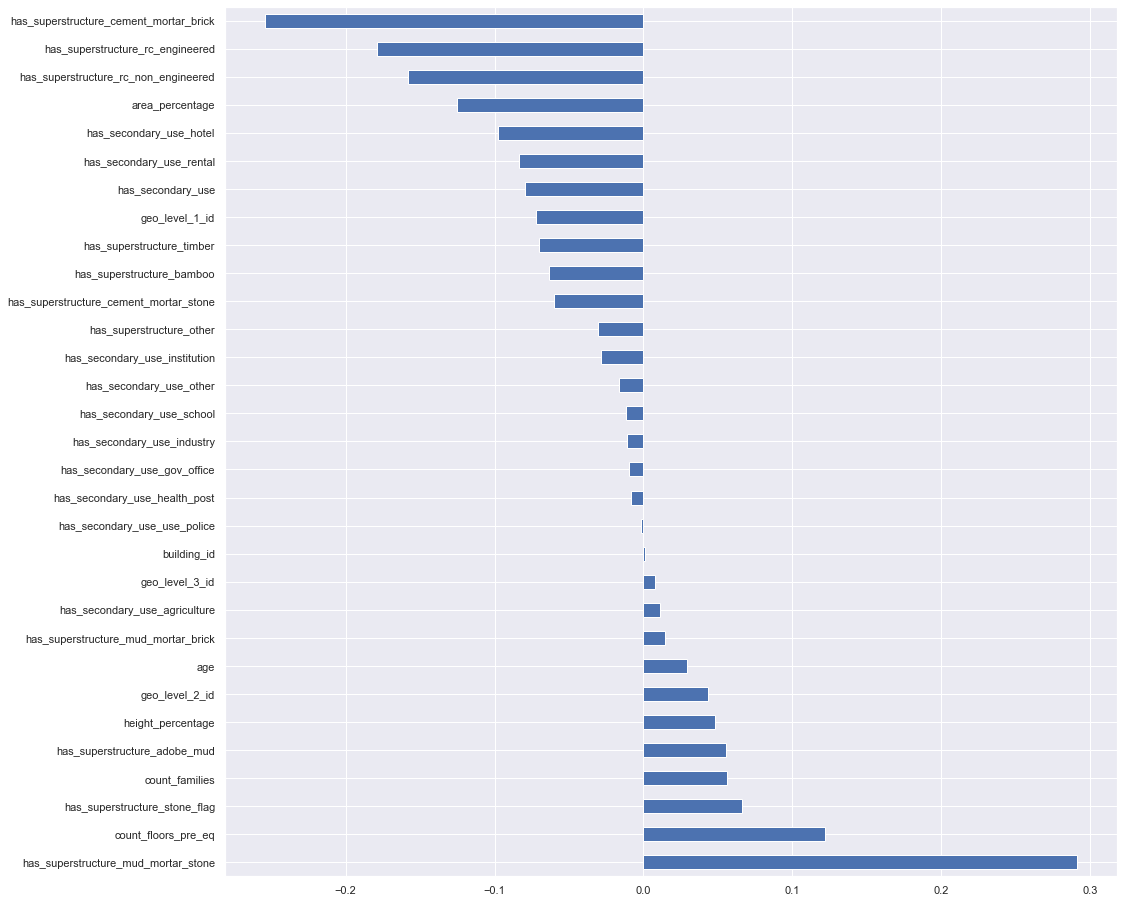

In [126]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

## **EDA (Recommendation Material and Characteristic)**

In [127]:
list_corr = corr_matrix['damage_grade'].drop('damage_grade')
list_corr

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.029273
area_percentage                          -0.125221
height_percentage                         0.048130
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                 

**Recommendation Material**

Definisikan *features* yang termasuk ke dalam kategori material adalah 
*   ***has_superstructure_adobe_mud***
*   ***has_superstructure_mud_mortar_stone***
*   ***has_superstructure_stone_flag***
*   ***has_superstructure_cement_mortar_stone***
*   ***has_superstructure_mud_mortar_brick***
*   ***has_superstructure_cement_mortar_brick***
*   ***has_superstructure_timber***
*   ***has_superstructure_bamboo***
*   ***has_superstructure_rc_non_engineered***
*   ***has_superstructure_rc_engineered***
*   ***has_superstructure_other***


In [128]:
list_corr.loc[[
              'has_superstructure_adobe_mud', 
              'has_superstructure_mud_mortar_stone',
              'has_superstructure_stone_flag',
              'has_superstructure_cement_mortar_stone',
              'has_superstructure_mud_mortar_brick',
              'has_superstructure_cement_mortar_brick', 
              'has_superstructure_timber',
              'has_superstructure_bamboo', 
              'has_superstructure_rc_non_engineered',
              'has_superstructure_rc_engineered', 
              'has_superstructure_other'
              ]]

has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
Name: damage_grade, dtype: float64

Berdasarkan gambar dari pengaruh *features* material bangunan terhadap tingkat kerusakan bangunan, kita akan memilih 4 *features* material yang memiliki tingkat korelasi tertinggi dengan **damage_grade**. 4 *features* tersebut adalah **has_superstructure_mud_mortar_stone**, **has_superstructure_cement_mortar_brick**, **has_superstructure_rc_engineered**, dan **has_superstructure_rc_non_engineered**. Diperoleh beberapa *insight* berdasarkan data pada proses EDA sebelumnya yaitu.
*  Bangunan yang tidak mempunyai superstruktur *Reinforce Concrete Engineered* banyak mengalami tingkat kerusakan menengah dan tinggi jika dilihat berdarkan persebaranya terhadap jumlah lantai, tinggi bangunan, dan luas bangunan.
*  Jumlah bangunan yang menggunakan superstruktur *Reinforce Concrete Non Engineered* mengalami tingkat kerusakan mengengah lebih daripada jumlah bangunan yang menggunakan superstruktur *Reinforce Concrete Engineered* jika dilihat berdarkan persebaranya terhadap jumlah lantai, tinggi bangunan, dan luas bangunan.
*  Bangunan yang menggunakan superstruktur *Cement Mortar Brick* mengalami tingkat kerusakan yang lebih rendah dibandingkan yang tidak menggunakan.

Maka dari itu kita dapat memberikan rekomendasi karakteristik bangunan (rumah) dengan ciri-ciri sebagai berikut.
*  Menggunakan superstruktur *Reinforce Conrete Engineered*
*  Menggunakan superstruktur *Cement Mortar Brick*

**Recommendation Characteristic**

Definisikan *features* yang termasuk ke dalam kategori karakteristik adalah 

*   ***count_floors_pre_eq***
*   ***age***
*   ***area_percentage***
*   ***height_percentage***
*   ***foundation_type***
*   ***roof_type***
*   ***ground_floor_type***
*   ***other_floor_type*** 
*   ***position***

In [129]:
list_corr.loc[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]

count_floors_pre_eq    0.122308
age                    0.029273
area_percentage       -0.125221
height_percentage      0.048130
Name: damage_grade, dtype: float64

Berdasarkan gambar dari pengaruh *features* karakteristik bangunan terhadap tingkat kerusakan bangunan, diperoleh bangunan yang mengalami tingkat kerusakan terbanyak adalah bangunan dengan kriteria sebagai berikut.
*  Bangunan dengan jumlah lantai sebanyak 2
*  Bangunan yang berusia 0-50 tahun
*  Bangunan dengan tinggi ternormalisasi 3-9 $m$
*  Bangunan dengan luas ternormalisasi 4-10 $m^2$ 

Maka dari itu kita dapat memberikan rekomendasi karakteristik bangunan (rumah) dengan ciri-ciri sebagai berikut.
*  Bangunan dengan jumlah lantai sebanyak 1 atau 3
*  Bangunan dengan tinggi ternormalisasi kurang dari 3 $m$ atau lebih dari 9 $m$
*  Bangunan dengan luas ternormalisasi kurang dari 4 $m^2$ atau lebih dari 10 $m^2$